# **Breast Cancer Data Analysis and Machine Learning Project**

# Part 1: Data Analysis Notebook

The dataset used in this analysis is from the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database. This is a Canada-UK Project which contains targeted sequencing data of 1,980 breast cancer samples. The dataset was collected by Professor Carlos Caldas from Cambridge Research Institute and Professor Sam Aparicio from the British Columbia Cancer Centre in Canada and published on Nature Communications (Pereira et al., 2016).

The data contains 31 clinical attributes, m-RNA levels z-score for 331 genes, and mutation in 175 genes.

**Outline:**
1. Diagnostic Analysis
2. Data Cleaning/Processing
3. Descriptive Analysis
4. Inferential Analysis with Hypothesis Tests
5. Summary of Inferential Analysis
6. References

# Diagnostic Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans


from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read in CSV file
df = pd.read_csv('breast_cancer.csv')

In [6]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.isnull().sum()

,0
patient_id,0
age_at_diagnosis,0
type_of_breast_surgery,22
cancer_type,0
cancer_type_detailed,15
...,...
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


In [8]:
df['cancer_type'].value_counts()

,count
cancer_type,
Breast Cancer,1903
Breast Sarcoma,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [10]:
df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [11]:
df.describe(include='object')

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1882,1904,1889,1850,1904,1874,1904,1904,1904,1889,...,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904
unique,2,2,6,3,7,2,2,4,2,8,...,5,5,5,4,4,4,3,4,3,3
top,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
freq,1127,1903,1500,939,679,1445,1459,1383,1668,1454,...,1900,1900,1900,1901,1901,1024,1902,1024,1902,1024


In [12]:
df['cancer_type_detailed'].value_counts()

,count
cancer_type_detailed,
Breast Invasive Ductal Carcinoma,1500
Breast Mixed Ductal and Lobular Carcinoma,207
Breast Invasive Lobular Carcinoma,142
Breast Invasive Mixed Mucinous Carcinoma,22
Breast,17
Metaplastic Breast Cancer,1


In [13]:
df['tumor_stage'].value_counts()

,count
tumor_stage,
2.0,800
1.0,475
3.0,115
4.0,9
0.0,4


In [14]:
df['overall_survival'].value_counts()

,count
overall_survival,
0,1103
1,801


# **Data Cleaning/Processing:**

In [55]:
died = clinical_attributes[clinical_attributes['overall_survival'] == 0]
survived = clinical_attributes[clinical_attributes['overall_survival'] == 1]

alive = clinical_attributes[clinical_attributes['death_from_cancer'] == 'Living']
dead = clinical_attributes[clinical_attributes['death_from_cancer'] == 'Died of Disease']
died_not_cancer = clinical_attributes[clinical_attributes['death_from_cancer'] == 'Died of Other Causes']

There are 31 clinical attributes in the dataset:

In [15]:
# Create a new dataframe with clinical attributes only
clinical_attributes = df.iloc[:, 1:32]
clinical_attributes.head().T

,0,1,2,3,4
age_at_diagnosis,75.65,43.19,48.87,47.68,76.97
type_of_breast_surgery,MASTECTOMY,BREAST CONSERVING,MASTECTOMY,MASTECTOMY,MASTECTOMY
cancer_type,Breast Cancer,Breast Cancer,Breast Cancer,Breast Cancer,Breast Cancer
cancer_type_detailed,Breast Invasive Ductal Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Ductal Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Breast Mixed Ductal and Lobular Carcinoma
cellularity,NaN,High,High,Moderate,High
chemotherapy,0,0,1,1,1
pam50_+_claudin-low_subtype,claudin-low,LumA,LumB,LumB,LumB
cohort,1.0,1.0,1.0,1.0,1.0
er_status_measured_by_ihc,Positve,Positve,Positve,Positve,Positve
er_status,Positive,Positive,Positive,Positive,Positive


In [ ]:
clinical_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1882 non-null   object 
 2   cancer_type                     1904 non-null   object 
 3   cancer_type_detailed            1889 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1832 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

# Genetic Data:

In [42]:
# dropping mutations
genetic_features_to_drop = df.columns[520:]
genetic_df = df.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= df['overall_survival']

genetic_df.head()

,patient_id,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,...,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,overall_survival
0,0,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201,-0.4844,...,-0.0250,-0.4113,2.8096,2.8014,-0.0004,0.9673,0.3011,-0.8436,1.8227,1
1,2,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390,1.2266,...,-0.1003,0.7791,-0.2273,-0.4462,-1.9854,0.5022,-0.9526,-1.8435,1.6662,1
2,5,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721,-1.7910,...,1.2084,-0.6572,0.1984,-1.0721,-0.9729,0.0515,0.1109,0.9874,-0.0154,0
3,6,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010,-1.3905,...,0.3142,-0.4413,0.1932,-1.0215,0.4553,-0.2354,0.4003,1.4839,0.3101,1
4,8,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320,-0.3582,...,-0.6606,-1.4697,0.4128,-1.5326,-0.4795,1.0052,0.9739,0.8825,-0.7598,0


In [44]:
#Finding Maximum values and std in each column, std is always 1 because the datapoints are z-scores
max_values = genetic_df.max()
std = genetic_df.std(axis = 0, skipna = True)
max_data = pd.concat([max_values, std], axis = 1, keys = ['max_values', 'std'])
max_data.sort_values(by='max_values', ascending = False).head()

,max_values,std
patient_id,7299.0000,2358.478332
tubb4a,18.6351,1.000263
hes5,17.1431,1.000262
itgb3,15.3308,1.000263
slco1b3,14.8651,1.000262


In [45]:
#Finding minimum values and std in each column, std is always 1 because the datapoints are z-scores
min_values = genetic_df.min()
std = genetic_df.std(axis = 0, skipna = True)
min_data = pd.concat([min_values, std], axis = 1, keys = ['min_values', 'std'])
min_data.sort_values(by='min_values', ascending = True).head()

,min_values,std
mlh1,-6.4387,1.000262
rab25,-6.3503,1.000264
hdac1,-5.9821,1.000263
spen,-5.9510,1.000263
foxo3,-5.7543,1.000263


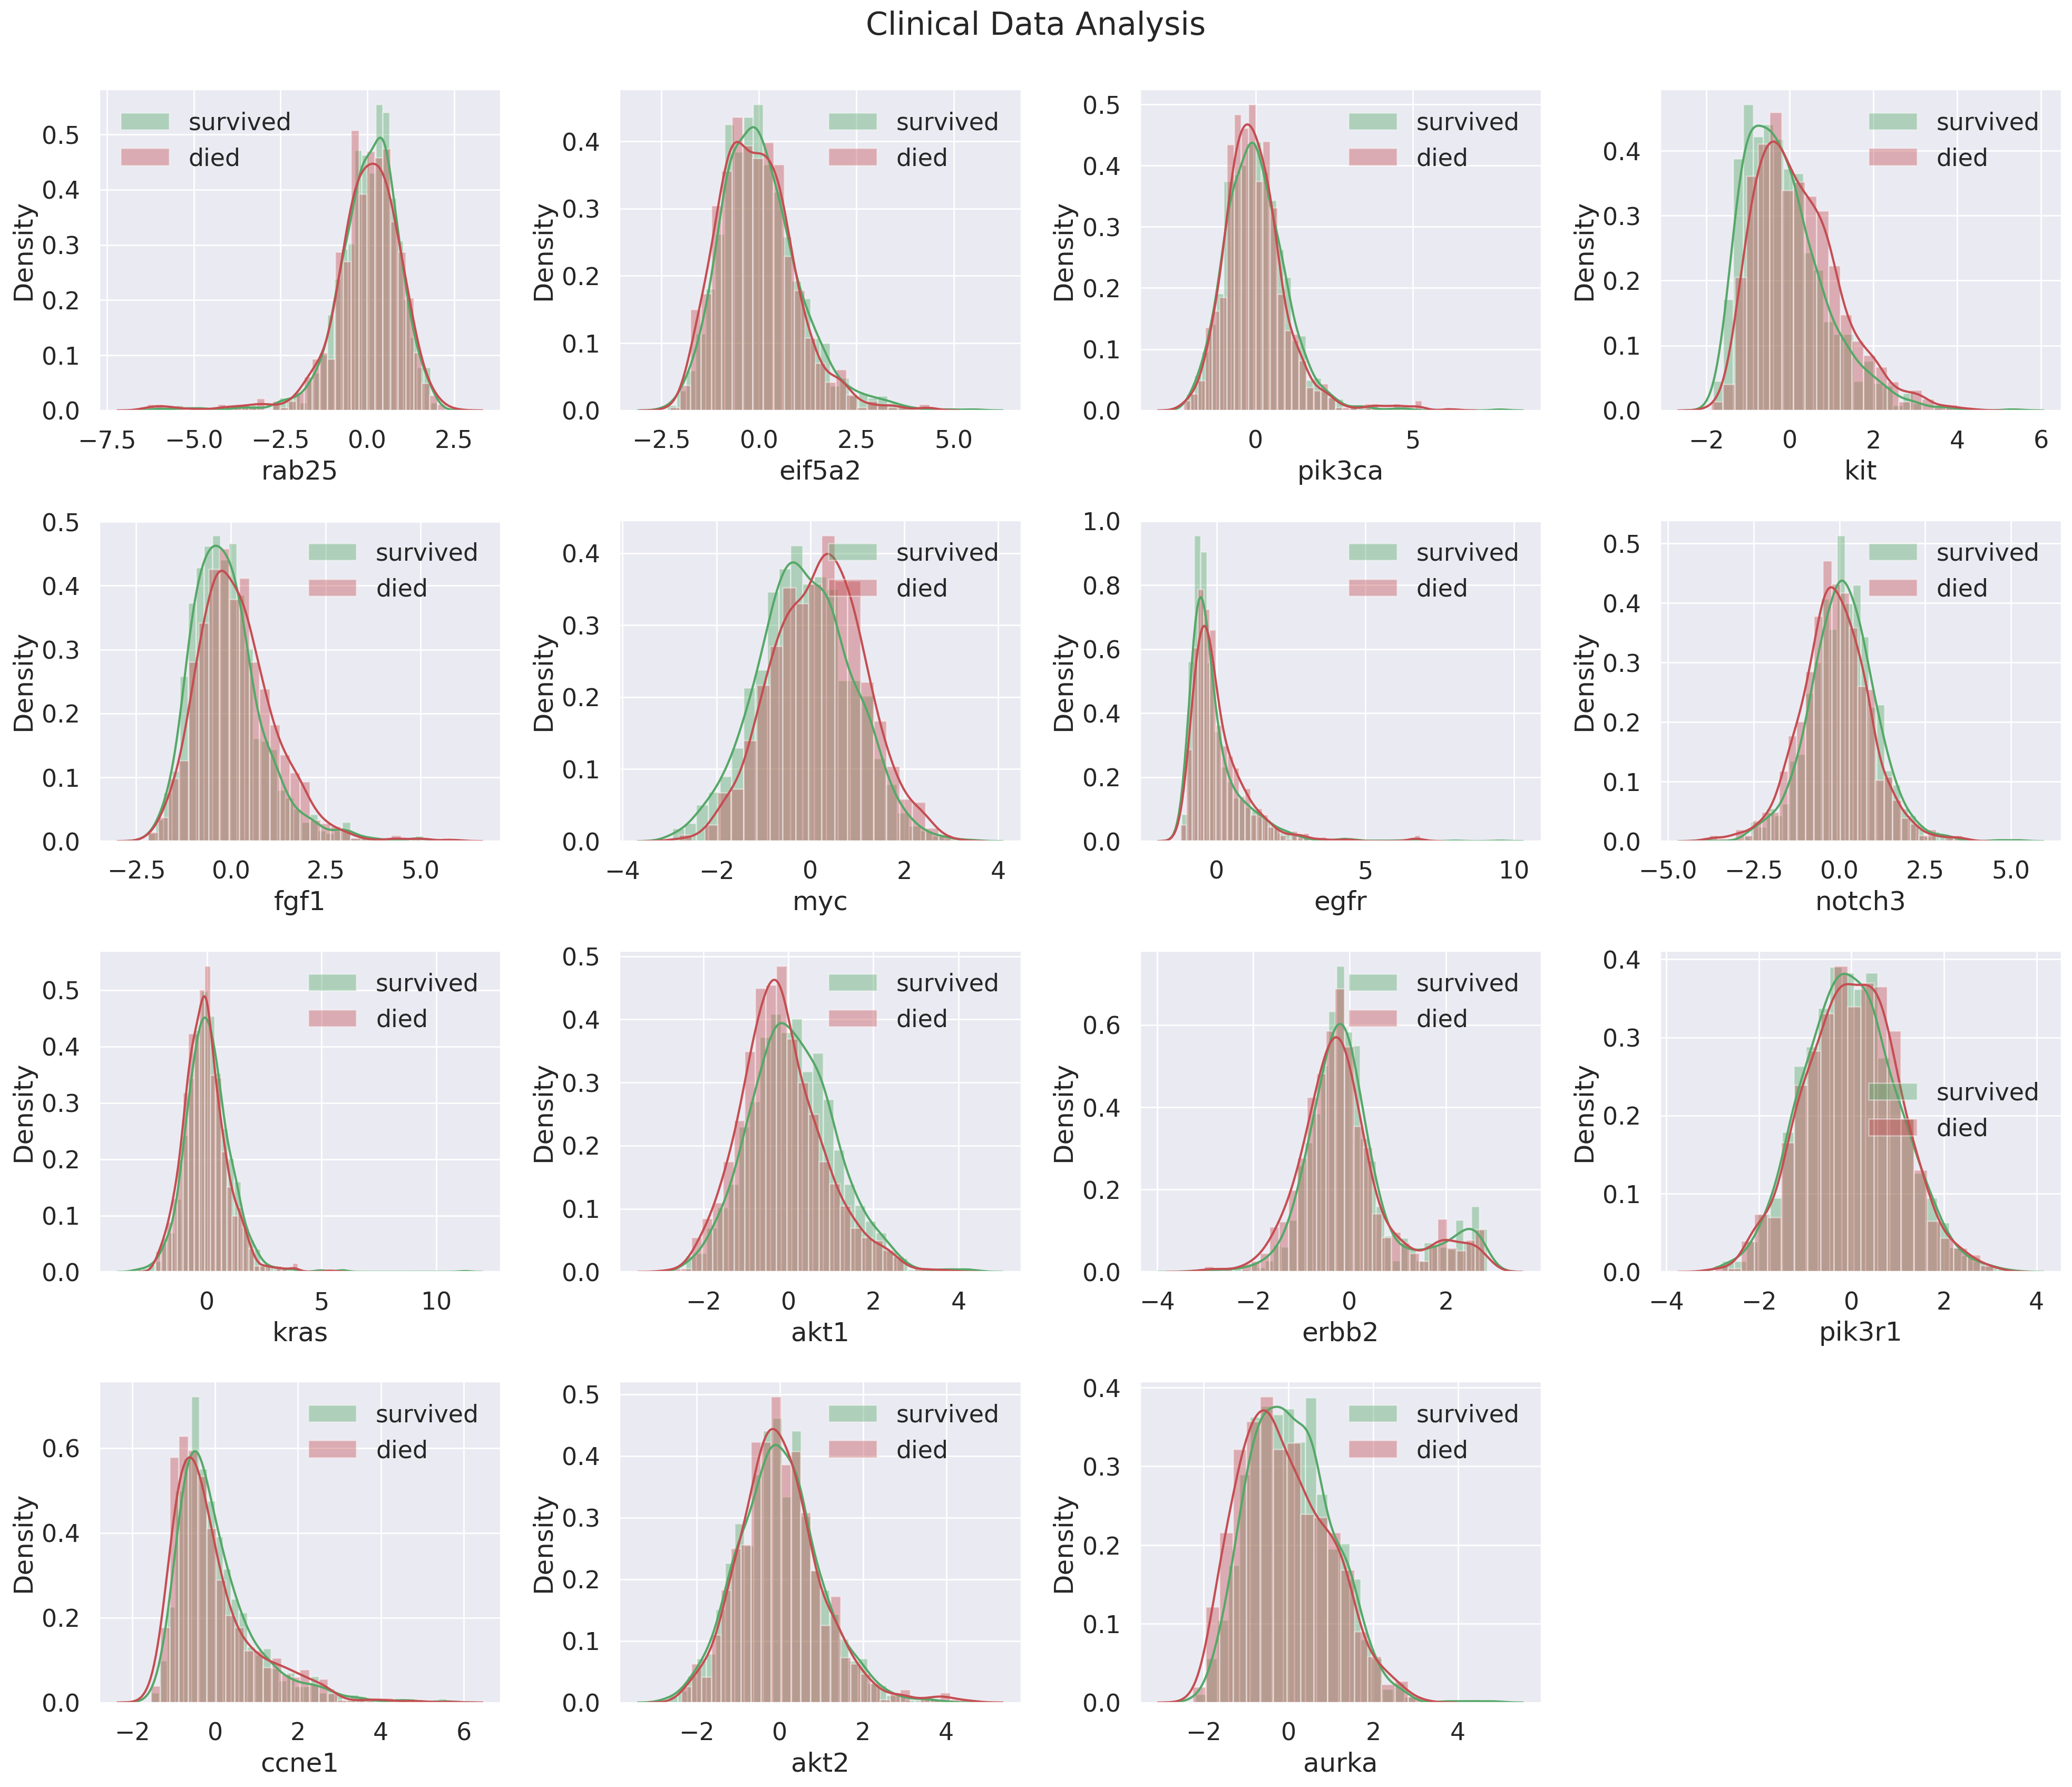

In [43]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in genetic_df.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(genetic_df[i][genetic_df['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(genetic_df[i][genetic_df['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Gene Mutation data:

In [41]:
# droping clinical and genetic data
mutation_features_to_drop = df.columns[4:520]
mutation_df = df.drop(mutation_features_to_drop, axis=1)
mutation_df = mutation_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)

# if there is a mutation=1, no-mutation=0
for column in mutation_df.columns[1:]:
    mutation_df[column]=pd.to_numeric(mutation_df[column], errors='coerce').fillna(1).astype(int)

mutation_df.insert(loc=1 , column='overall_survival', value=df['overall_survival'])

mutation_df.head()

,patient_id,overall_survival,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Descriptive Analysis Questions:**

# What is the distribution of age, lymph nodes examined positive, mutation count, nottingham prognostic index, overall survival months, and tumor size in the dataset?

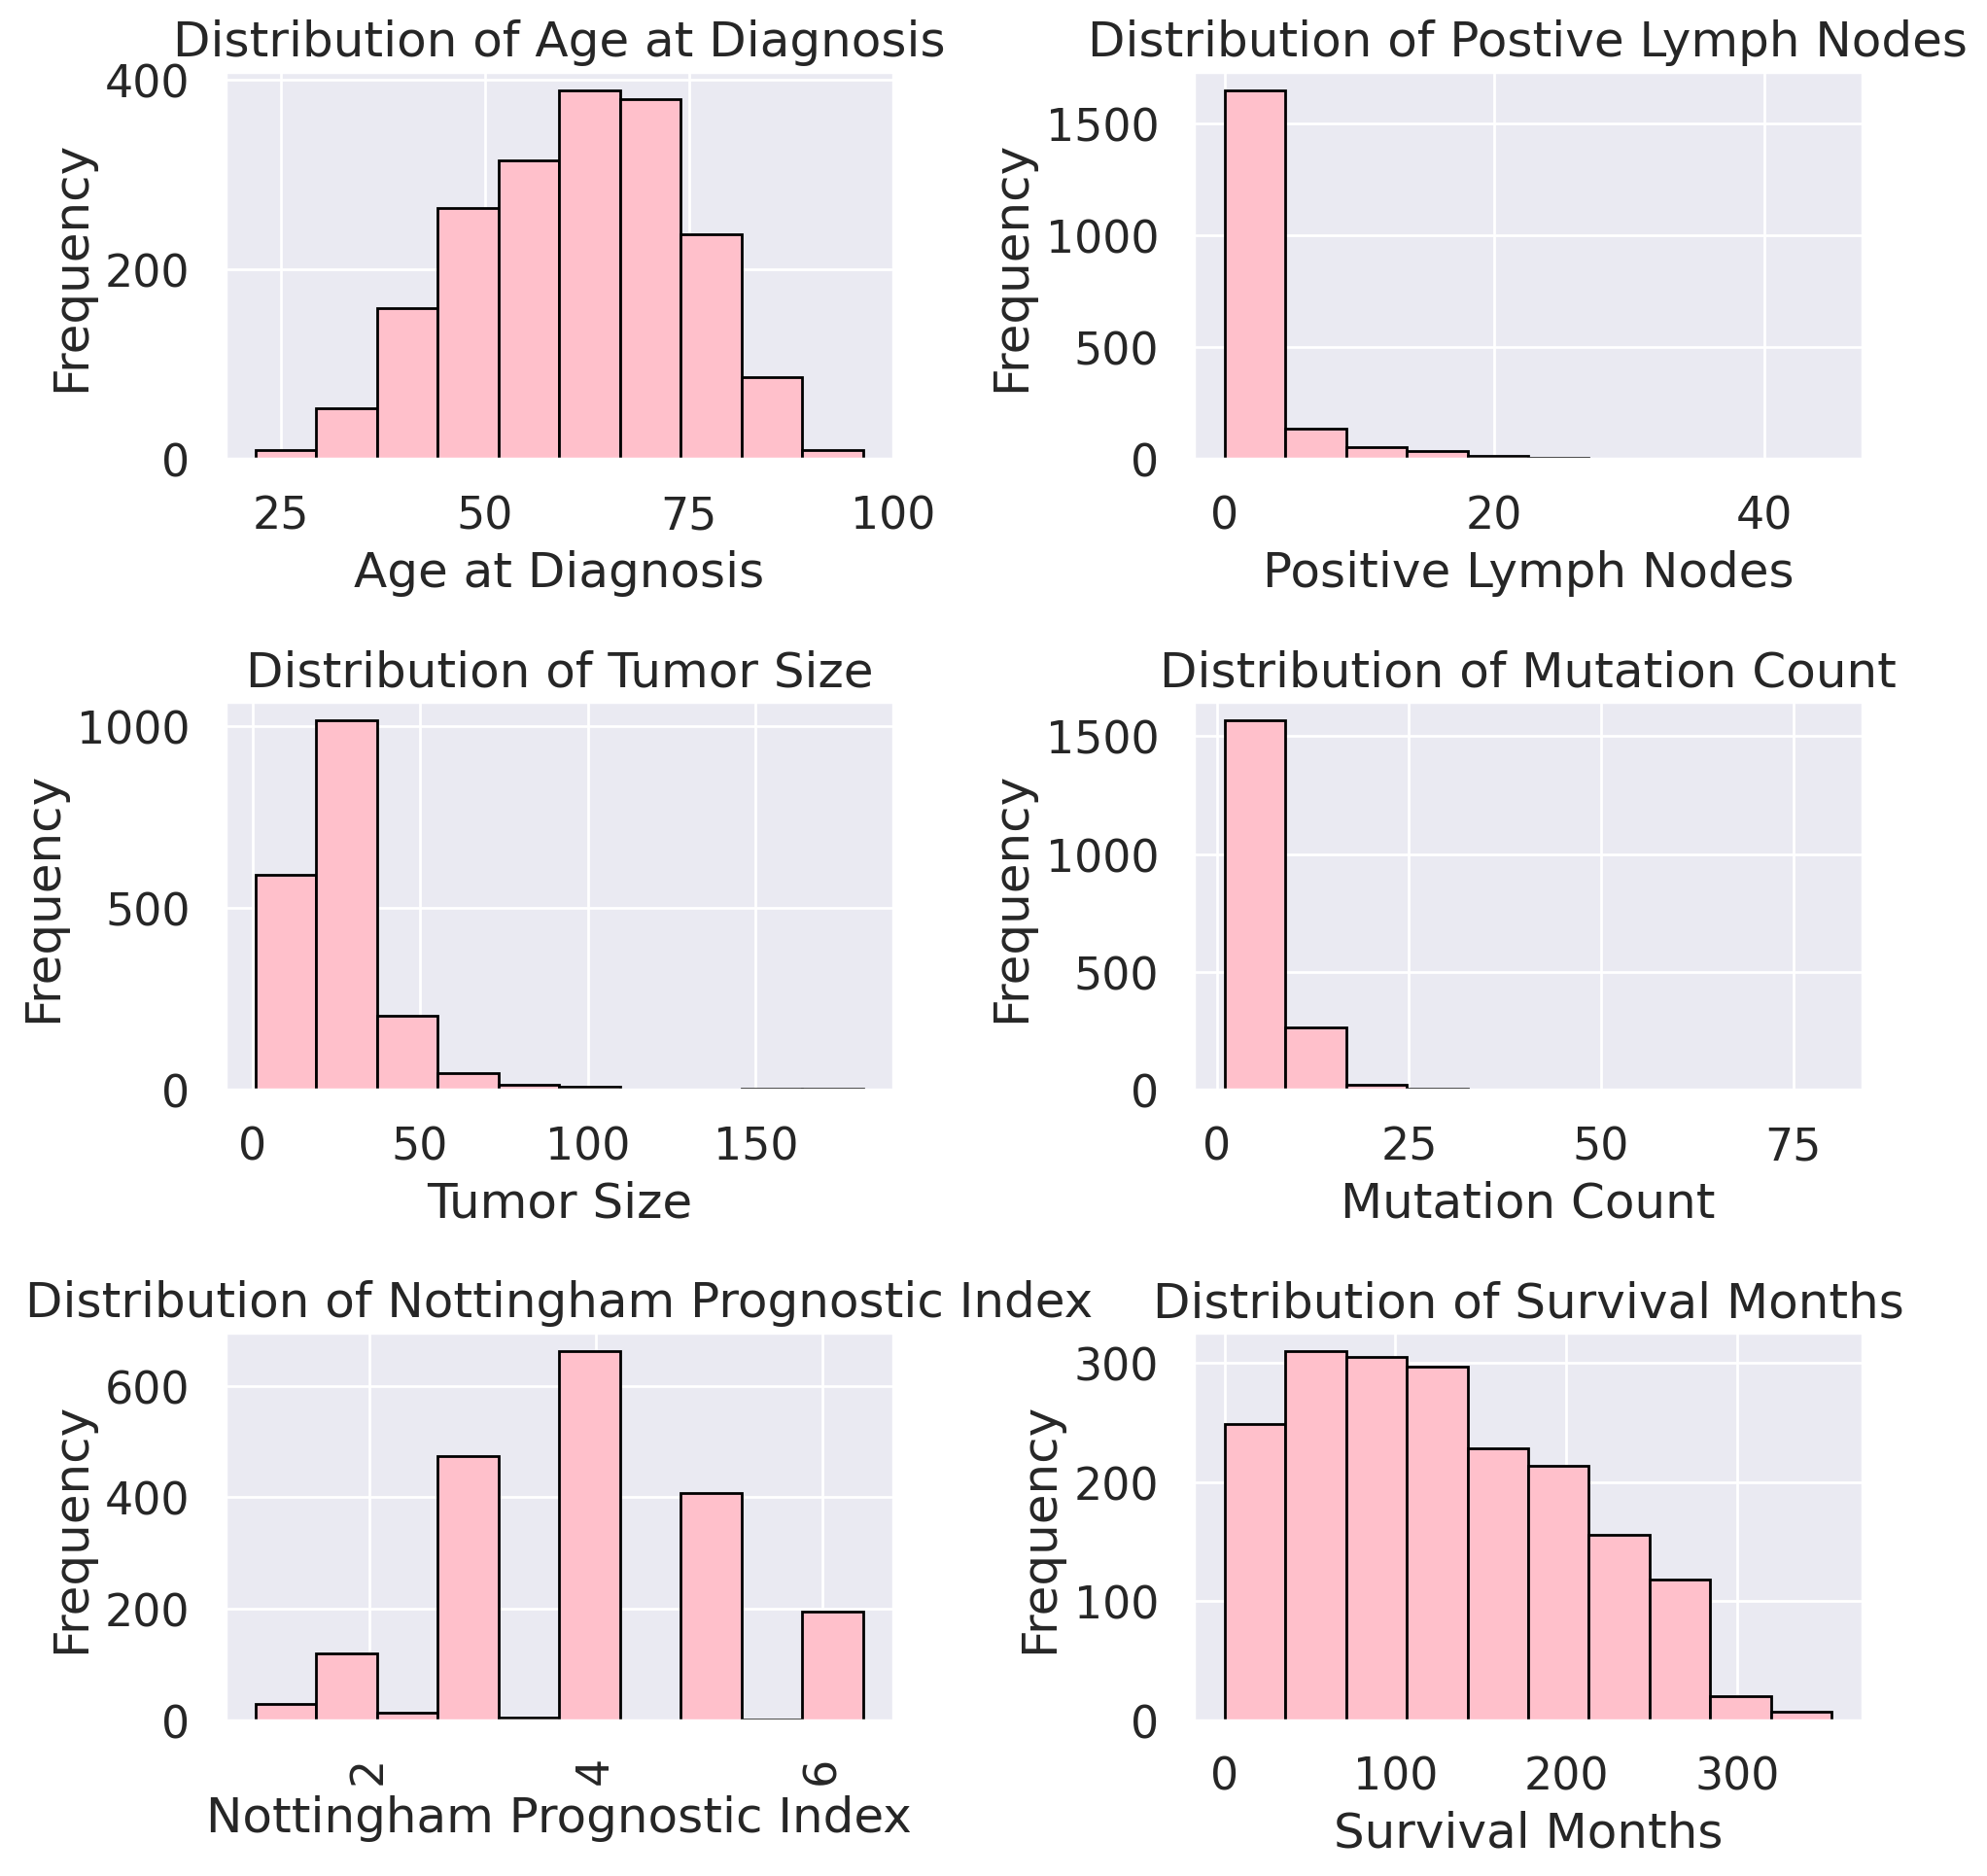

In [18]:
# Create a histogram for each column in the dataset

plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
plt.hist(df.age_at_diagnosis, color='pink', edgecolor = 'black')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.title('Distribution of Age at Diagnosis')

plt.subplot(3,3,2)
plt.hist(df.lymph_nodes_examined_positive, color='pink', edgecolor = 'black')
plt.xlabel('Positive Lymph Nodes')
plt.ylabel('Frequency')
plt.title('Distribution of Postive Lymph Nodes')

plt.subplot(3,3,4)
plt.hist(df.tumor_size, color='pink', edgecolor = 'black')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Size')

plt.subplot(3,3,5)
plt.hist(df.mutation_count, color='pink', edgecolor = 'black')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.title('Distribution of Mutation Count')

plt.subplot(3,3,7)
plt.hist(df.nottingham_prognostic_index, color='pink', edgecolor = 'black')
plt.xlabel('Nottingham Prognostic Index')
plt.ylabel('Frequency')
plt.tick_params(axis='x', rotation=90)
plt.title('Distribution of Nottingham Prognostic Index')

plt.subplot(3,3,8)
plt.hist(df.overall_survival_months, color='pink', edgecolor = 'black')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.title('Distribution of Survival Months')


plt.tight_layout()
plt.show()

# How does tumor stage affect survial months?

In [61]:
df['tumor_stage'].value_counts()

,count
tumor_stage,
2.0,800
1.0,475
3.0,115
4.0,9
0.0,4


<Axes: xlabel='tumor_stage', ylabel='count'>

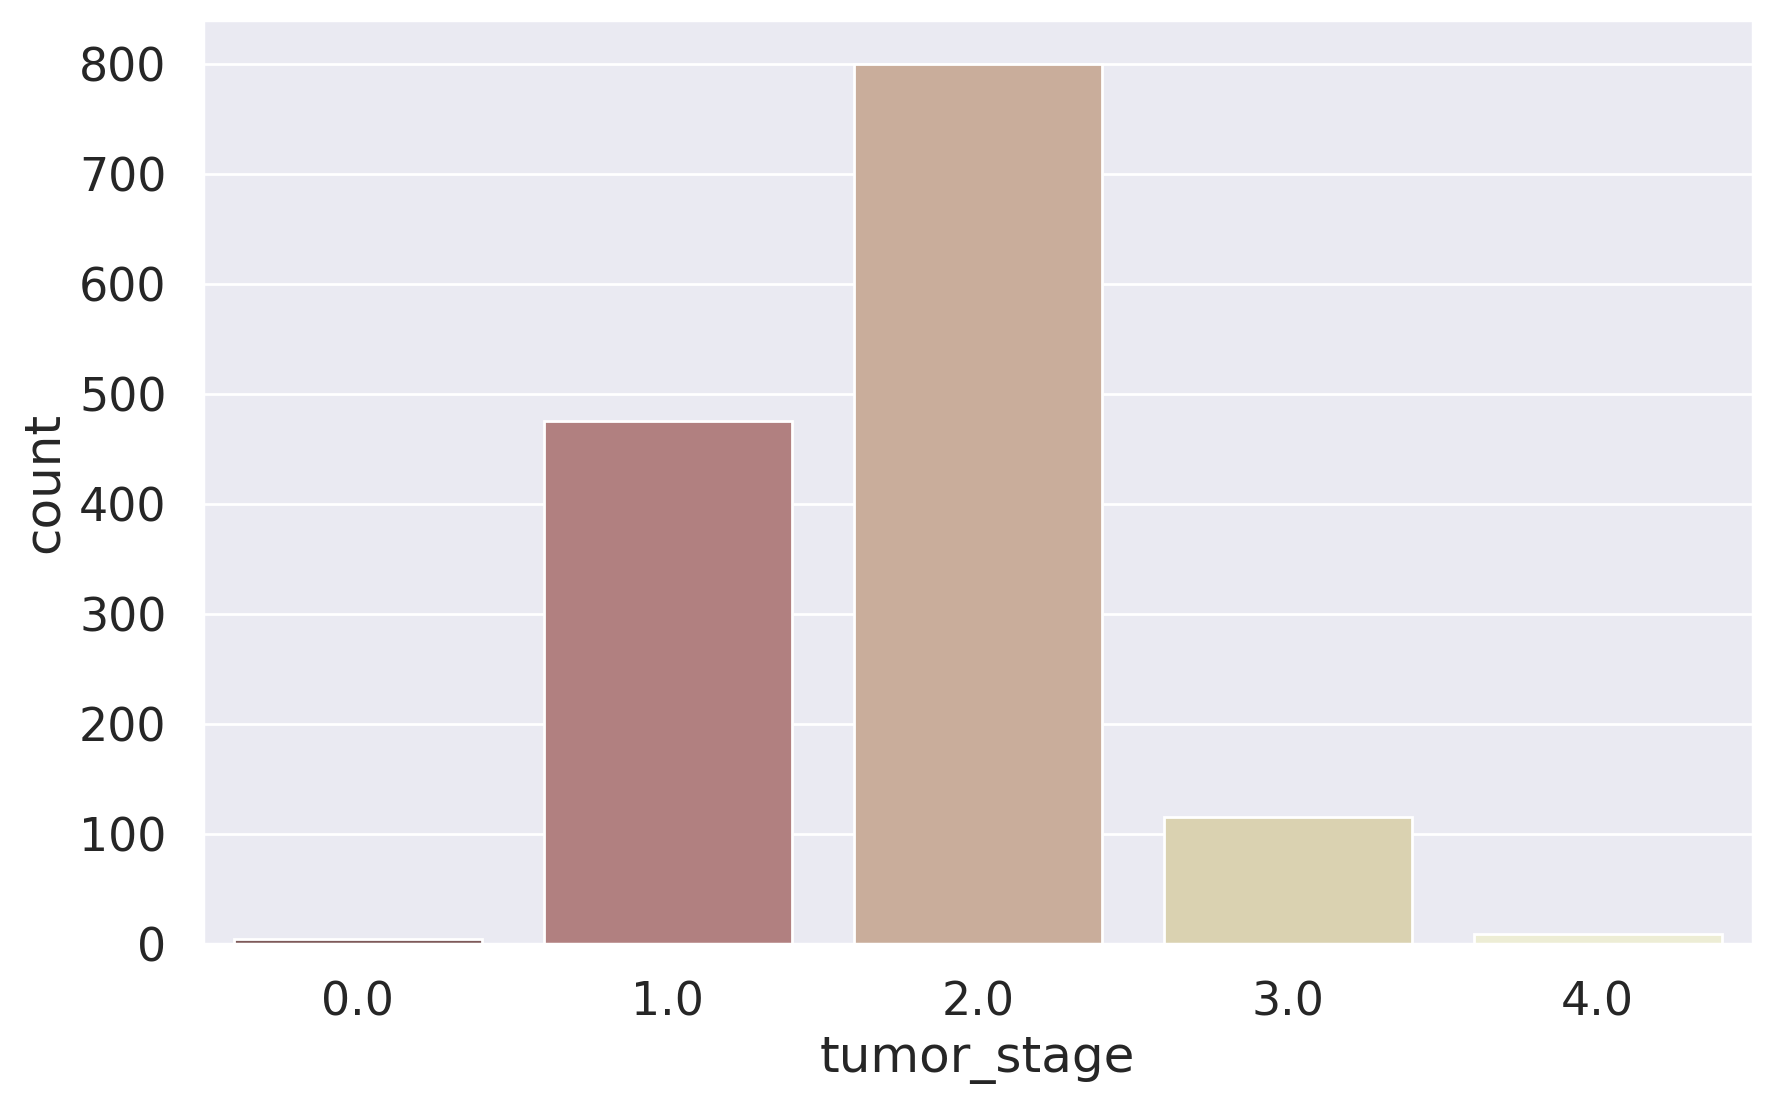

In [56]:
# Distribution of tumor stage
plt.figure(figsize=(10, 6))
sns.countplot(x='tumor_stage', data=df, palette='pink')

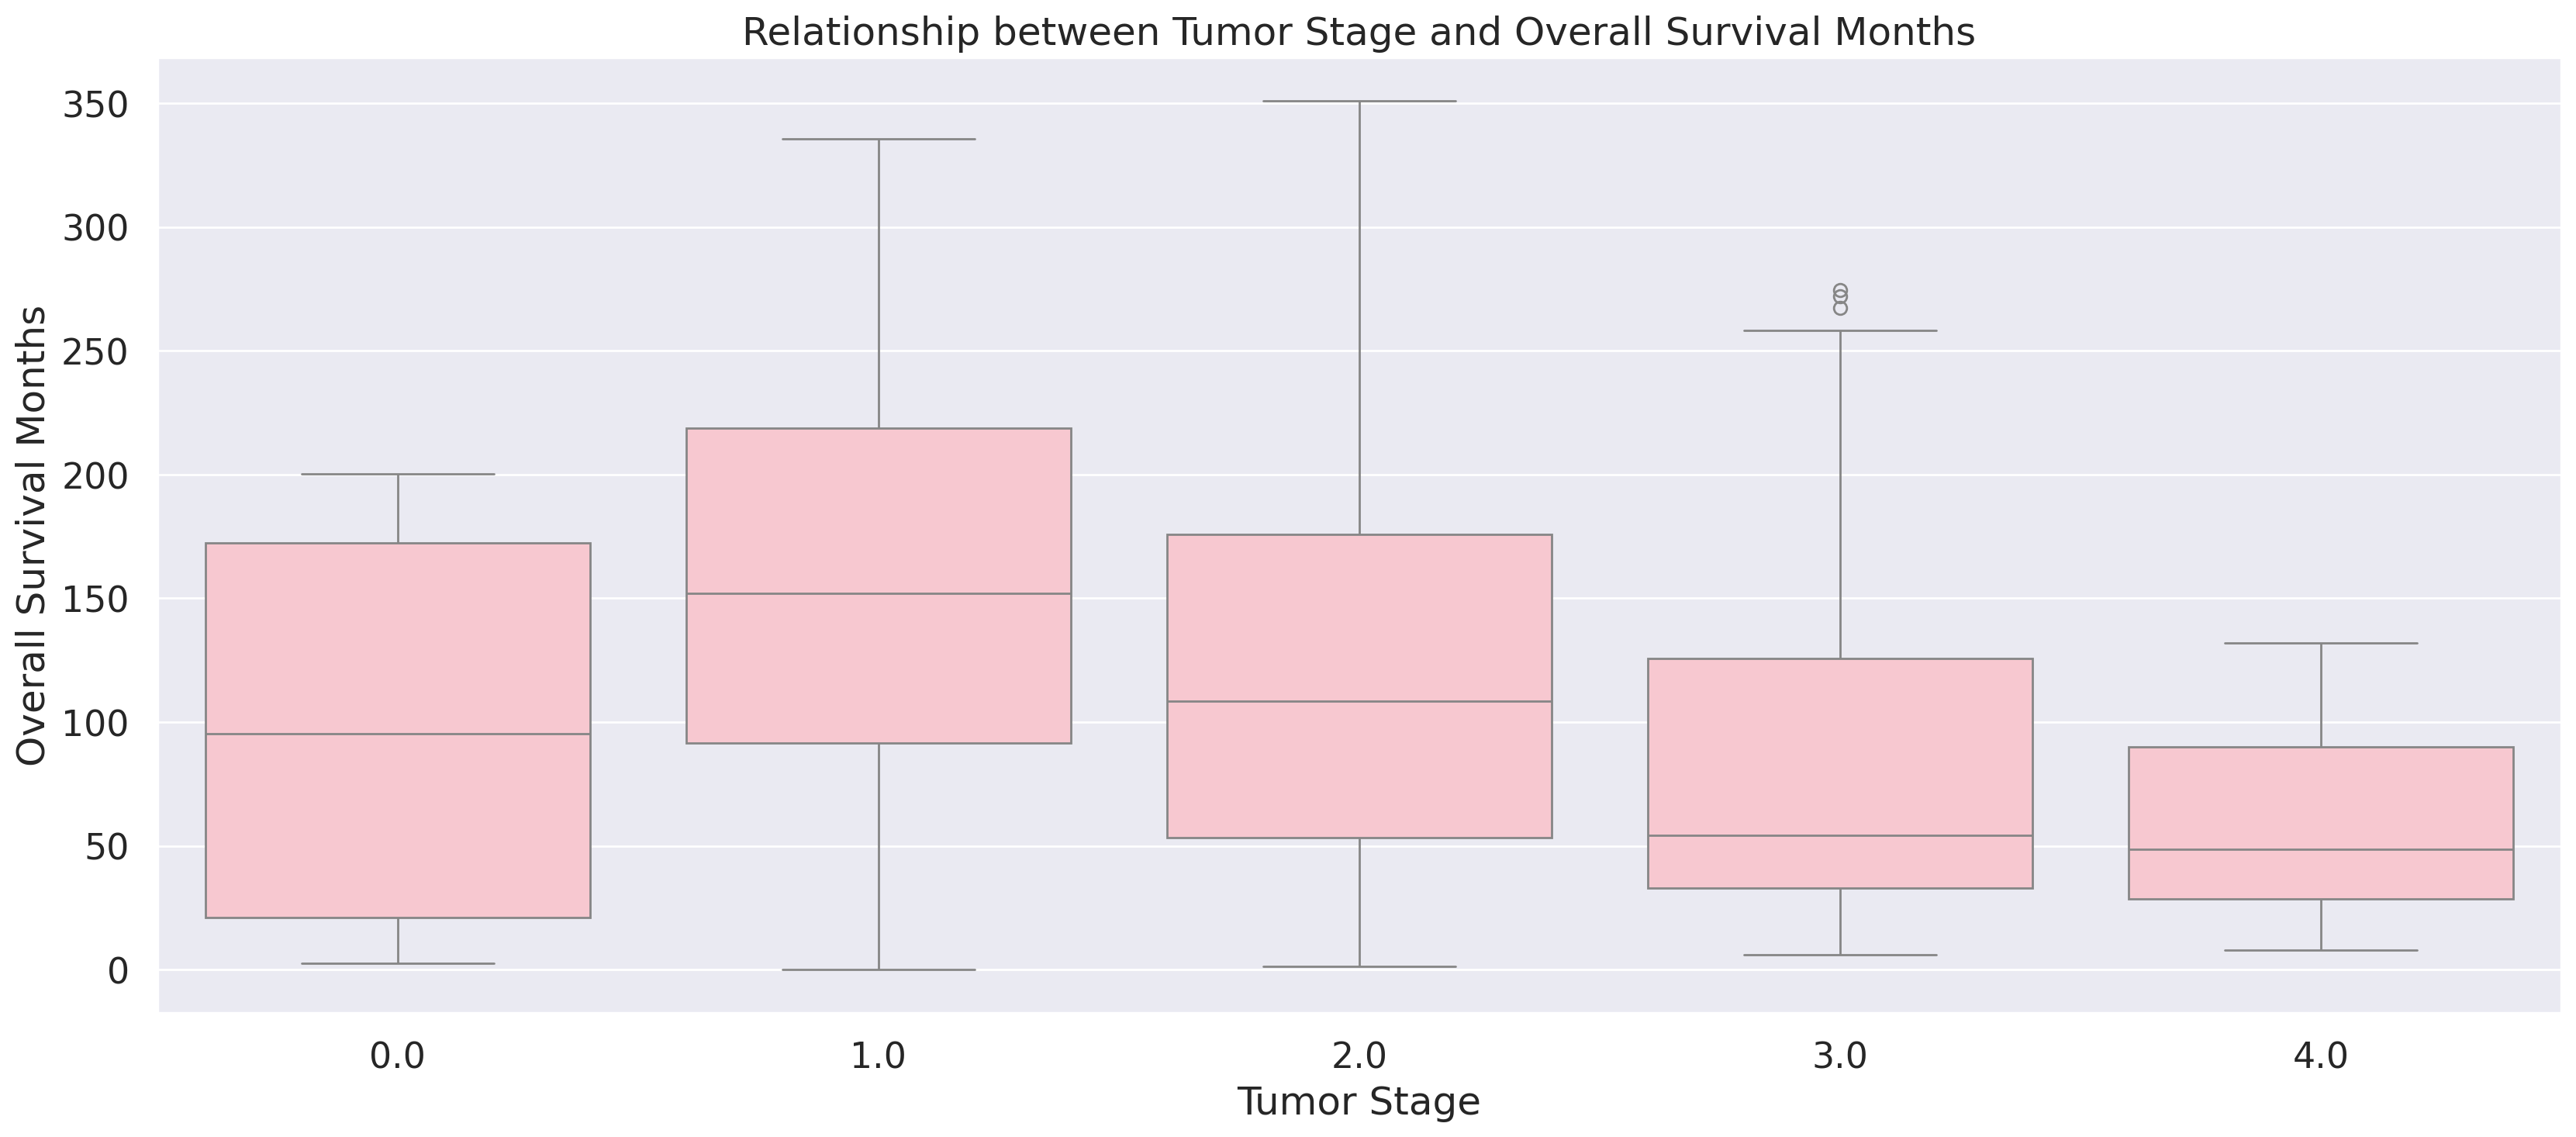

In [63]:
# Graph showing the relationship between tumor stage and overall survival months
plt.figure(figsize=(20, 8))
sns.boxplot(x='tumor_stage', y='overall_survival_months', data=df, color='pink')
plt.xticks(rotation=0)

# Label x axis
plt.xlabel('Tumor Stage')

# Label y axis
plt.ylabel('Overall Survival Months')

# Title graph
plt.title('Relationship between Tumor Stage and Overall Survival Months')

# Show graph
plt.show()


# What is the survival for each type of treatment?

In [20]:
# Grouby type of breast surgery and overall survival
df.groupby('type_of_breast_surgery')['overall_survival'].value_counts()

type_of_breast_surgery  overall_survival
BREAST CONSERVING       1                   404
                        0                   351
MASTECTOMY              0                   738
                        1                   389
Name: count, dtype: int64

In [22]:
# Groupby chemotherapy and overall survival
df.groupby('chemotherapy')['overall_survival'].value_counts()

chemotherapy  overall_survival
0             0                   891
              1                   617
1             0                   212
              1                   184
Name: count, dtype: int64

In [47]:
# Groupby hormone therapy and overall survival
df.groupby('hormone_therapy')['overall_survival'].value_counts()

hormone_therapy  overall_survival
0                0                   409
                 1                   321
1                0                   694
                 1                   480
Name: count, dtype: int64

In [48]:
# Groupby radio therapy and overall survival
df.groupby('radio_therapy')['overall_survival'].value_counts()

radio_therapy  overall_survival
0              0                   496
               1                   271
1              0                   607
               1                   530
Name: count, dtype: int64

# How many people received chemotherapy, radio therapy, or hormone therapy?

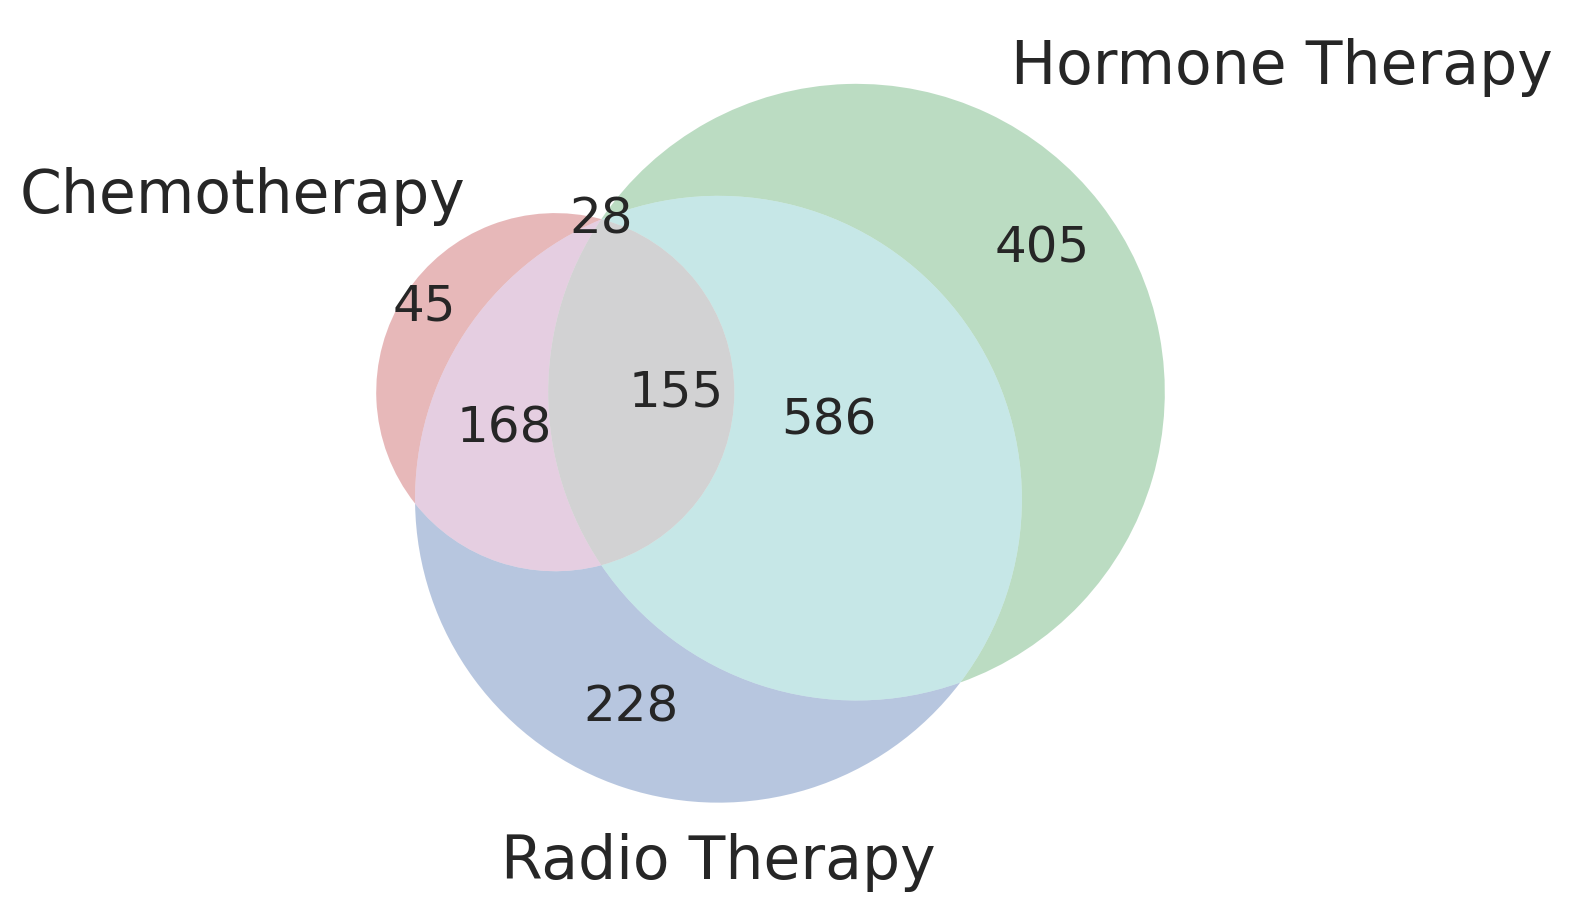

In [25]:
# create a venn diagram showing patients that received chemotherapy, hormone therapy and radio therapy

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Sample data (replace with your actual data)
chemotherapy = set(df[df['chemotherapy'] == 1].index)
hormone_therapy = set(df[df['hormone_therapy'] == 1].index)
radio_therapy = set(df[df['radio_therapy'] == 1].index)

# Create the Venn diagram
venn3([chemotherapy, hormone_therapy, radio_therapy], ('Chemotherapy', 'Hormone Therapy', 'Radio Therapy'))
plt.show()


# How did treatment type affect overall survival?

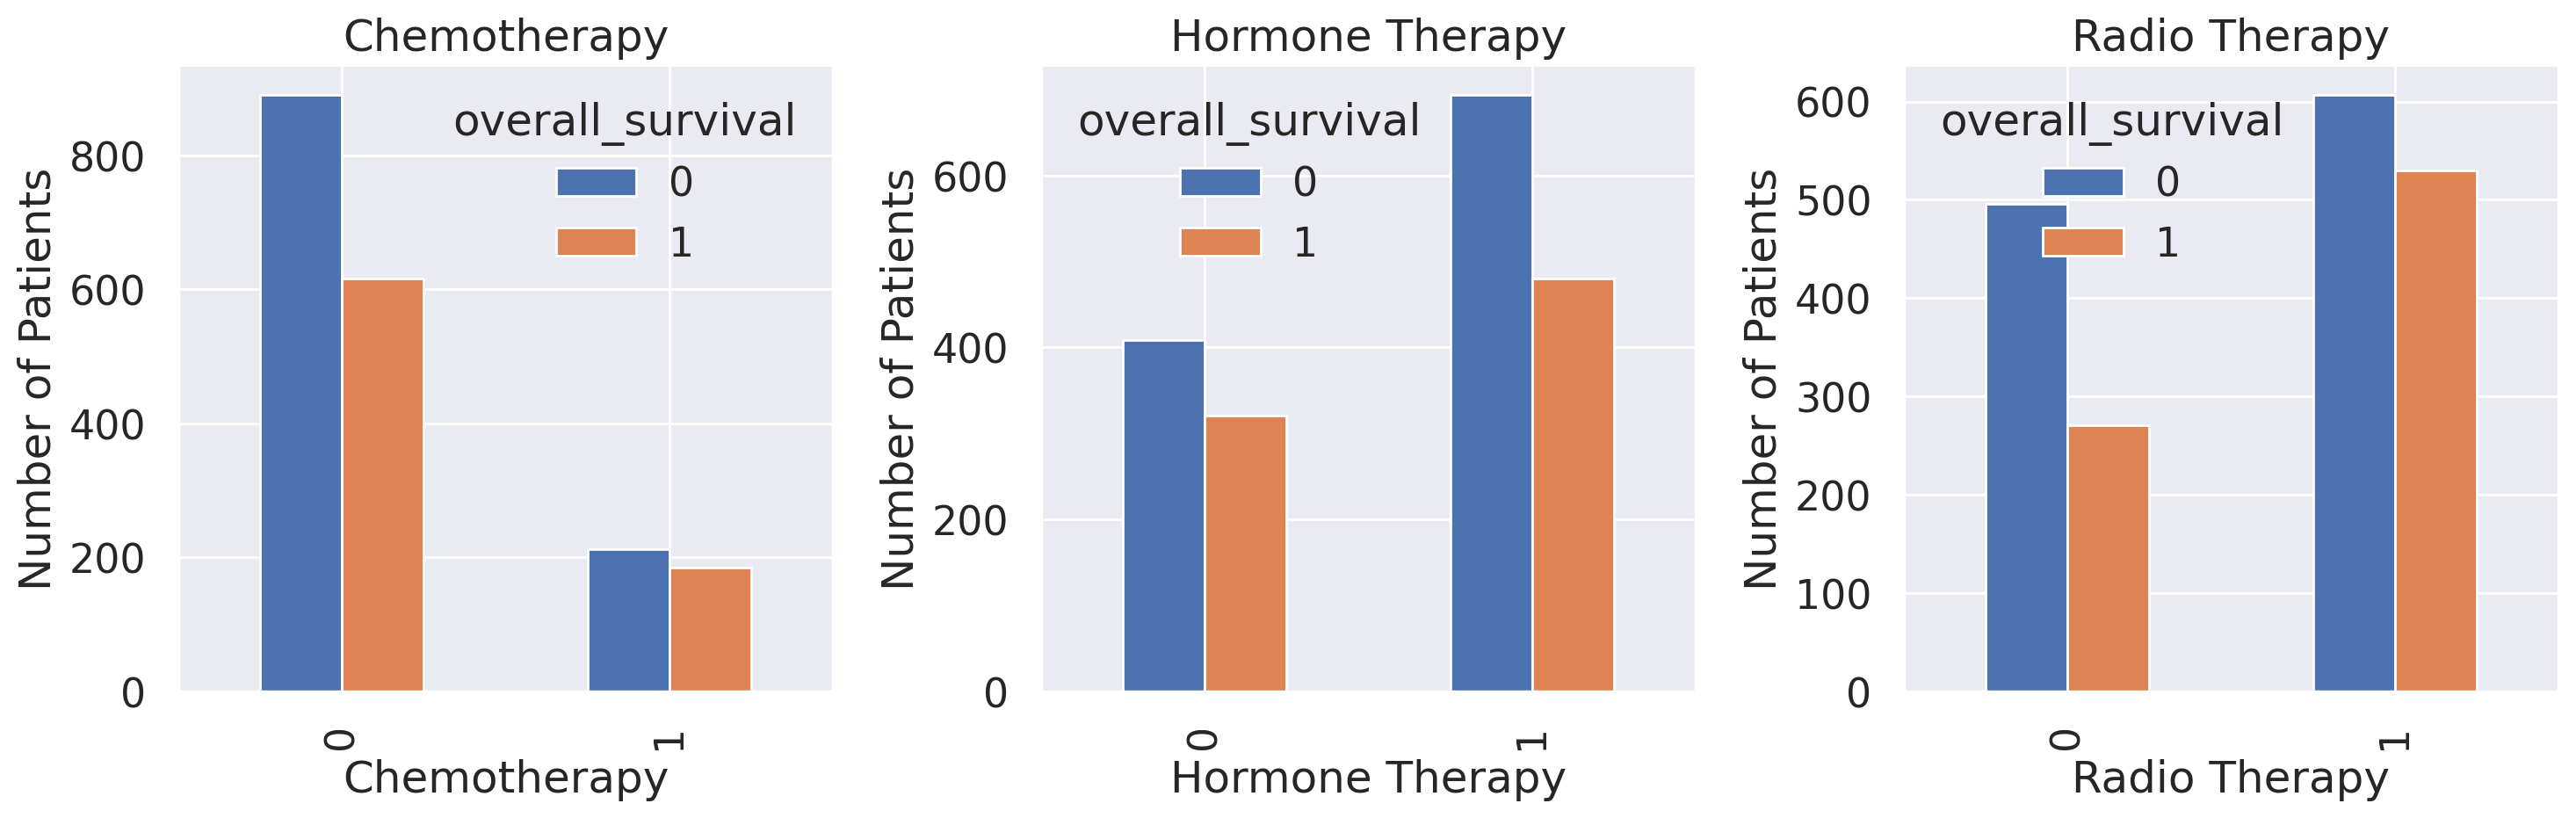

In [54]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Chemotherapy
df.groupby('chemotherapy')['overall_survival'].value_counts().unstack().plot(kind='bar', ax=axes[0], title='Chemotherapy')
axes[0].set_xlabel('Chemotherapy')
axes[0].set_ylabel('Number of Patients')


# Plot for Hormone Therapy
df.groupby('hormone_therapy')['overall_survival'].value_counts().unstack().plot(kind='bar', ax=axes[1], title='Hormone Therapy')
axes[1].set_xlabel('Hormone Therapy')
axes[1].set_ylabel('Number of Patients')


# Plot for Radio Therapy
df.groupby('radio_therapy')['overall_survival'].value_counts().unstack().plot(kind='bar', ax=axes[2], title='Radio Therapy')
axes[2].set_xlabel('Radio Therapy')
axes[2].set_ylabel('Number of Patients')


plt.tight_layout()
plt.show()

# What is the correlation between key features from the clinical attributes?

In [64]:
# Find the pearson correlation between overall_survival, overall_survival_months, and tumor_size

df[['overall_survival', 'overall_survival_months', 'tumor_size', 'tumor_stage', 'lymph_nodes_examined_positive', 'age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']].corr()

,overall_survival,overall_survival_months,tumor_size,tumor_stage,lymph_nodes_examined_positive,age_at_diagnosis,mutation_count,nottingham_prognostic_index
overall_survival,1.000000,0.384467,-0.164361,-0.188790,-0.164498,-0.303666,-0.077741,-0.138000
overall_survival_months,0.384467,1.000000,-0.188135,-0.273498,-0.240319,-0.150158,0.041647,-0.242773
tumor_size,-0.164361,-0.188135,1.000000,0.508244,0.264665,0.047493,0.018206,0.279806
tumor_stage,-0.188790,-0.273498,0.508244,1.000000,0.446636,0.085898,-0.024030,0.547172
lymph_nodes_examined_positive,-0.164498,-0.240319,0.264665,0.446636,1.000000,-0.006782,-0.048685,0.563086
age_at_diagnosis,-0.303666,-0.150158,0.047493,0.085898,-0.006782,1.000000,0.011967,-0.088429
mutation_count,-0.077741,0.041647,0.018206,-0.024030,-0.048685,0.011967,1.000000,-0.001376
nottingham_prognostic_index,-0.138000,-0.242773,0.279806,0.547172,0.563086,-0.088429,-0.001376,1.000000


<Axes: >

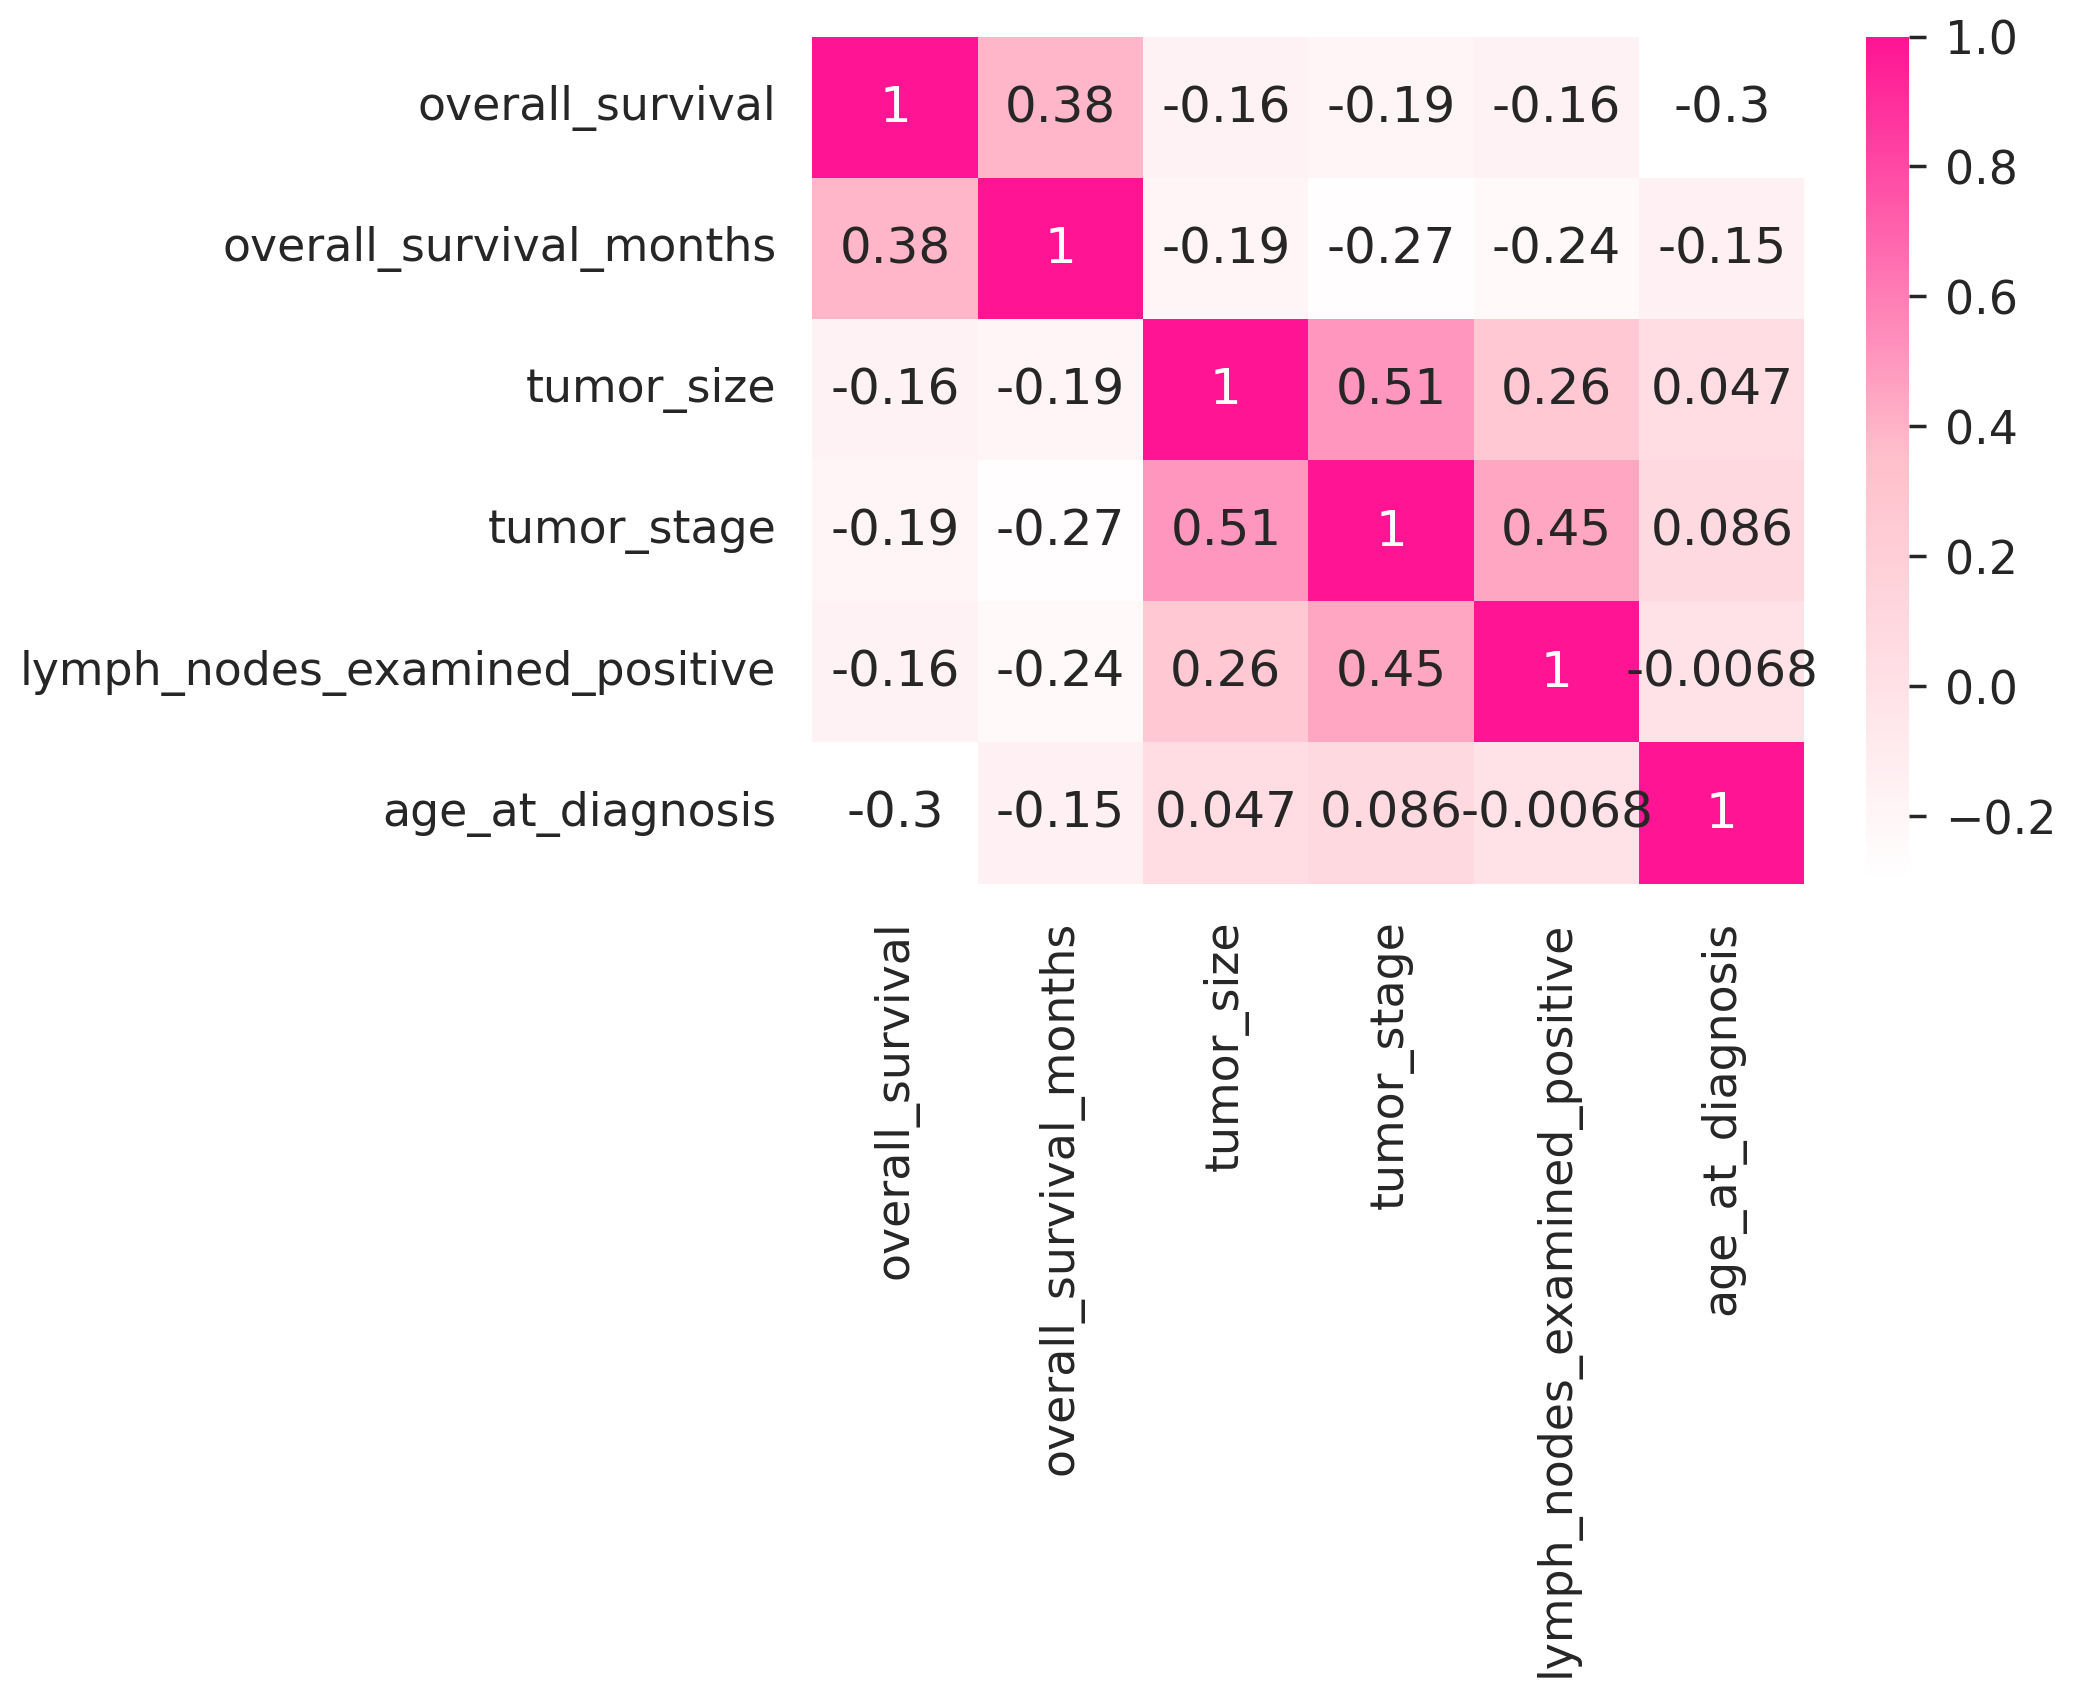

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

cmap = colors.LinearSegmentedColormap.from_list("pink_cmap", ["white", "pink", "deeppink"])

sns.heatmap(df[['overall_survival', 'overall_survival_months', 'tumor_size', 'tumor_stage', 'lymph_nodes_examined_positive', 'age_at_diagnosis']].corr(), annot=True, cmap=cmap)

#  Show the relationship between breast cancer type and survival:


In [28]:
# Relationship between cancer type detailed and survival
df.groupby('cancer_type_detailed')['overall_survival'].value_counts()

cancer_type_detailed                       overall_survival
Breast                                     1                    12
                                           0                     5
Breast Invasive Ductal Carcinoma           0                   866
                                           1                   634
Breast Invasive Lobular Carcinoma          0                    84
                                           1                    58
Breast Invasive Mixed Mucinous Carcinoma   1                    13
                                           0                     9
Breast Mixed Ductal and Lobular Carcinoma  0                   130
                                           1                    77
Metaplastic Breast Cancer                  0                     1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Breast Invasive Ductal Carcinoma'),
  Text(1, 0, 'Breast Mixed Ductal and Lobular Carcinoma'),
  Text(2, 0, 'Breast Invasive Lobular Carcinoma'),
  Text(3, 0, 'Breast Invasive Mixed Mucinous Carcinoma'),
  Text(4, 0, 'Breast'),
  Text(5, 0, 'Metaplastic Breast Cancer')])

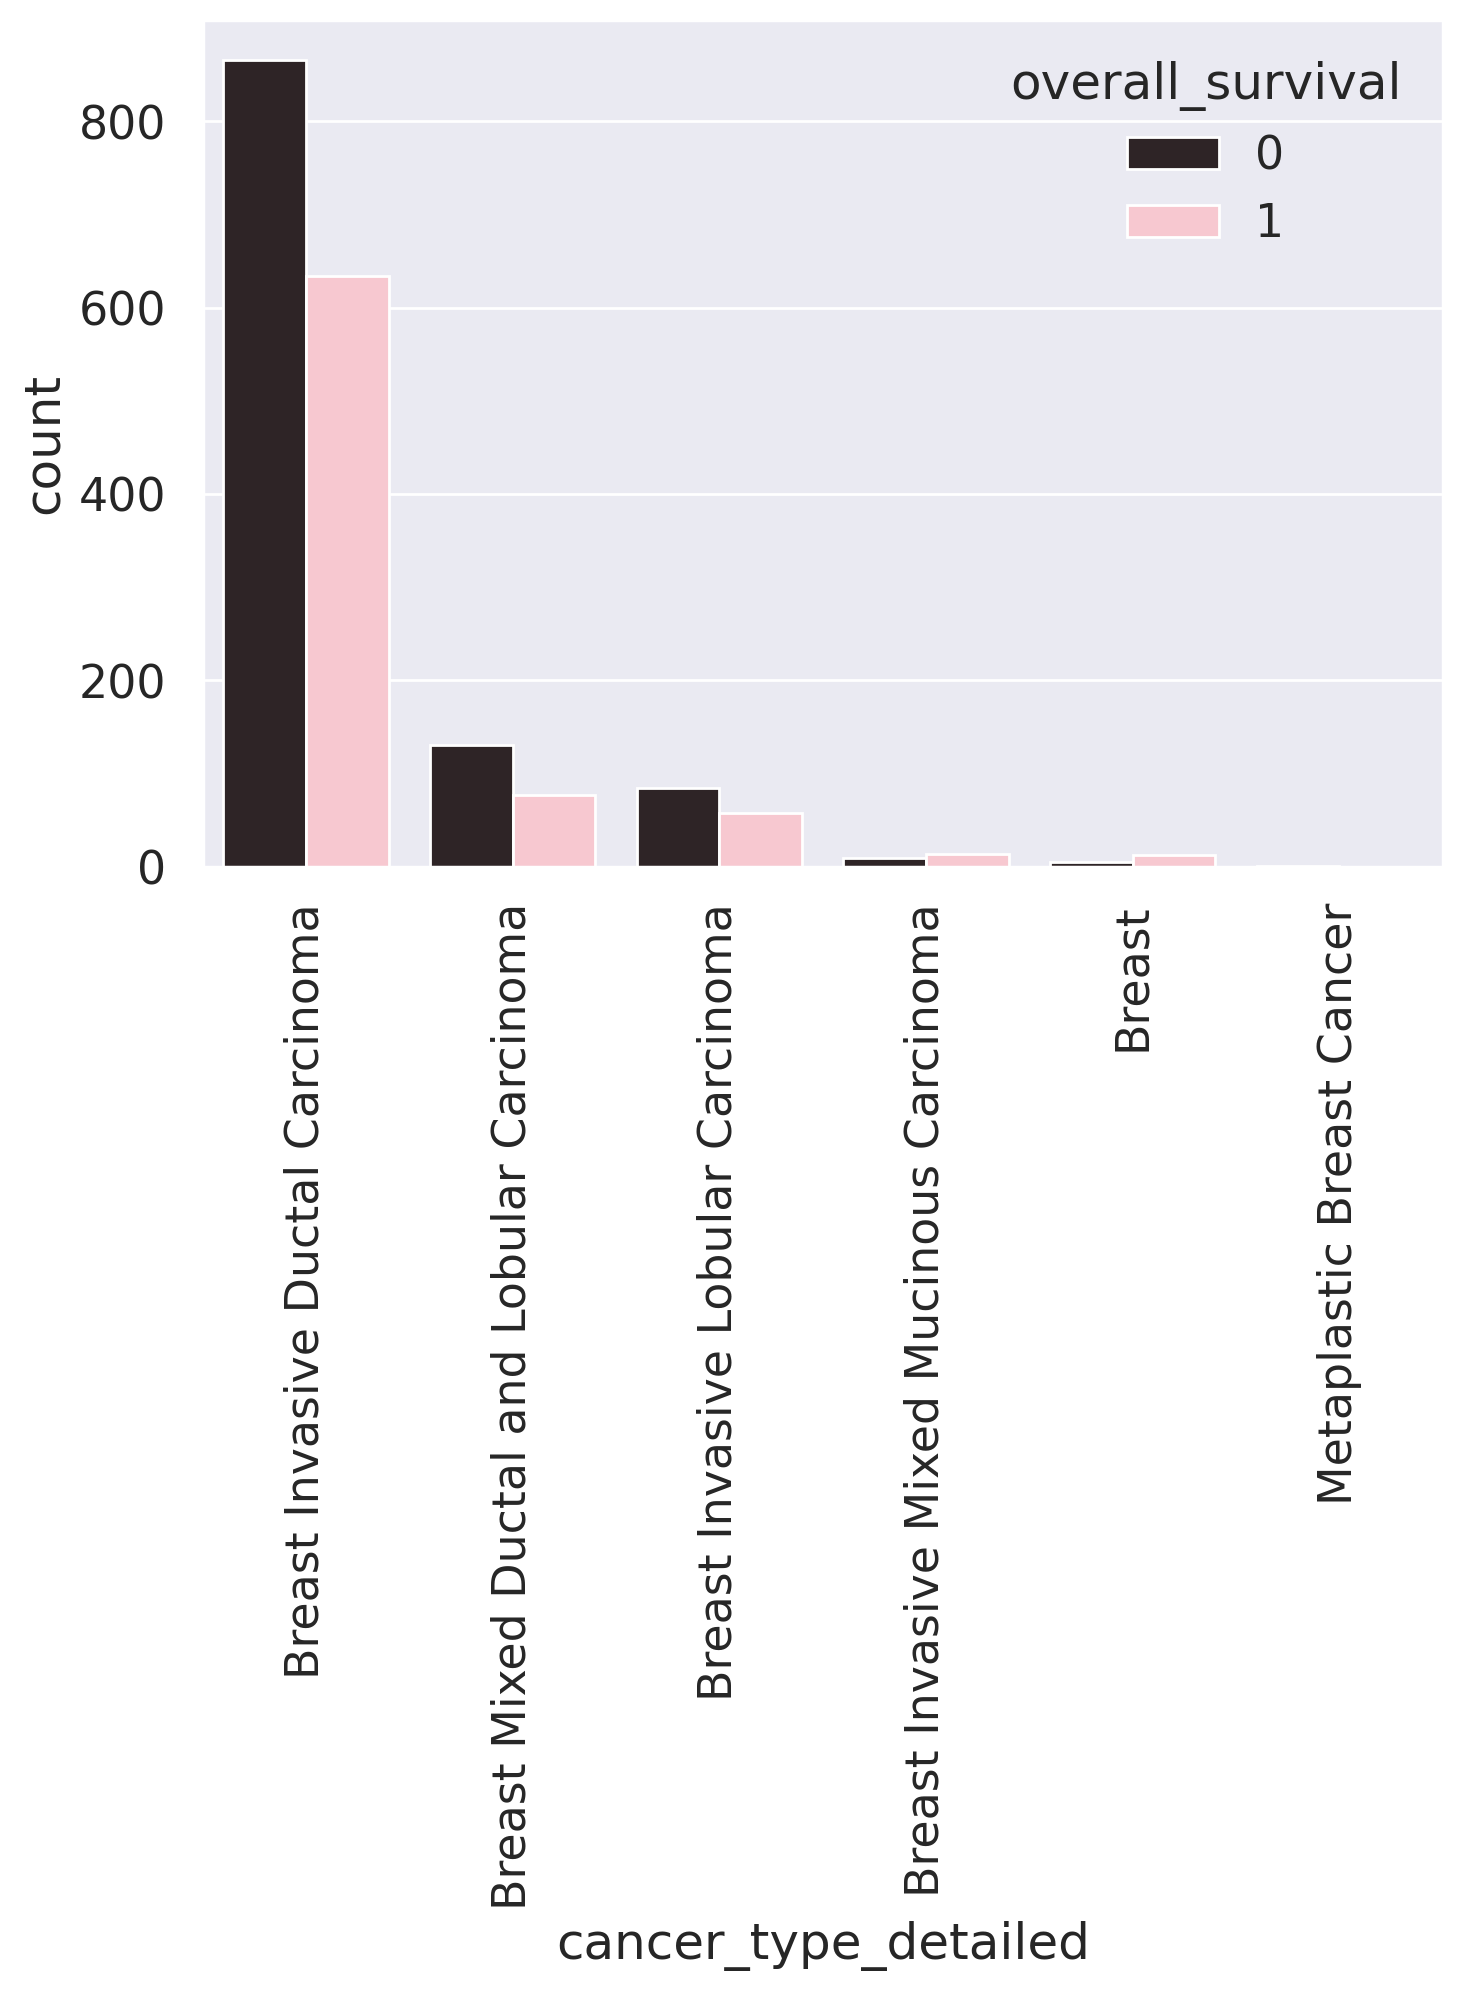

In [50]:
# Graph of relationship between cancer type detailed and survival
sns.countplot(x='cancer_type_detailed', hue='overall_survival', data=df, color='pink')
plt.xticks(rotation=90)

# Rotate x-axis labels
plt.xticks(rotation=90)

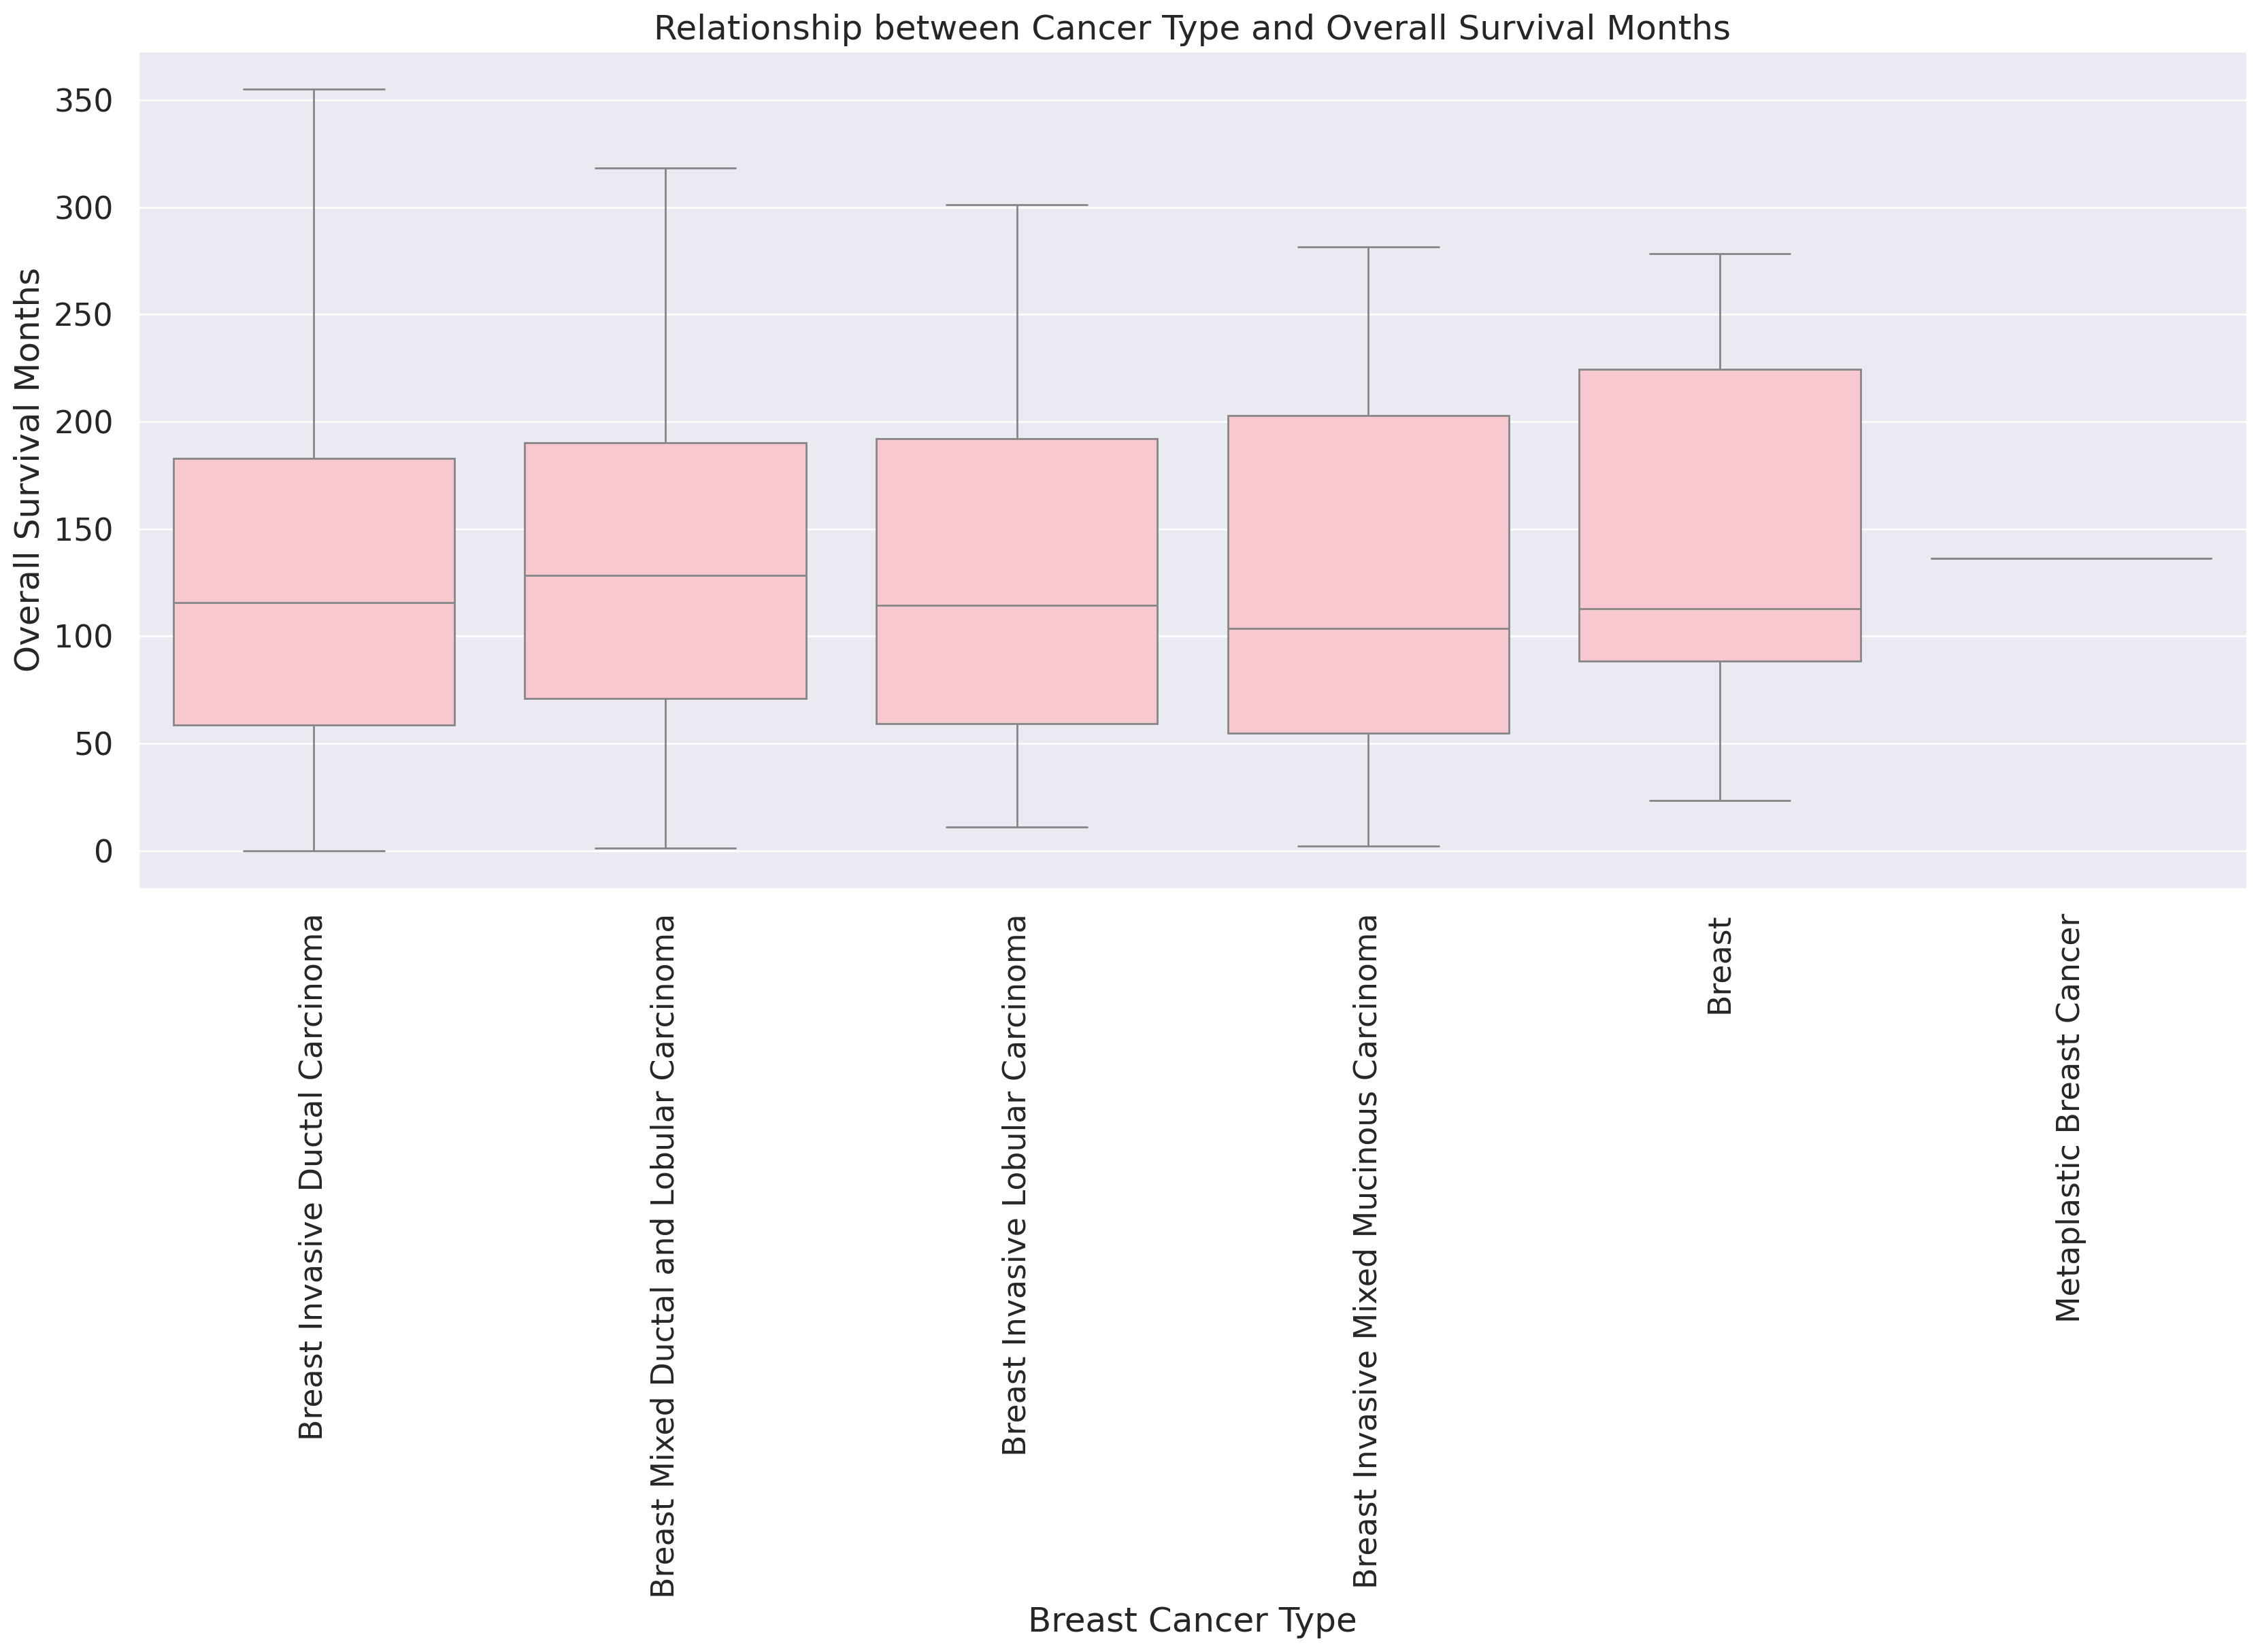

In [70]:
# Graph showing the relationship between cancer type detailed and overall survival months
plt.figure(figsize=(20, 8))
sns.boxplot(x='cancer_type_detailed', y='overall_survival_months', data=df, color='pink')
plt.xticks(rotation=90)

# Label x axis
plt.xlabel('Breast Cancer Type')

# Label y axis
plt.ylabel('Overall Survival Months')

# Title graph
plt.title('Relationship between Cancer Type and Overall Survival Months')

# Show graph
plt.show()


plt.show()


# How do gene expression levels correlate with tumor agressiveness (tumor size or tumor stage)?

In [85]:
# drop overall survival from genetic df
genetic_df = genetic_df.drop(['overall_survival'], axis=1)

In [86]:
tumor_size = df['tumor_size']

correlations = genetic_df.corrwith(tumor_size, method='pearson')

# Get the top positively and negatively correlated genes
top_positive_genes = correlations.sort_values(ascending=False).head(5)
top_negative_genes = correlations.sort_values(ascending=True).head(5)

print("Top positively correlated genes:\n", top_positive_genes)
print("\nTop negatively correlated genes:\n", top_negative_genes)



Top positively correlated genes:
 cdc25a     0.142355
aurka      0.141631
gsk3b      0.121344
ccnb1      0.114447
rps6kb2    0.112499
dtype: float64

Top negatively correlated genes:
 bcl2     -0.115404
stat5b   -0.104056
ahnak    -0.097981
aph1b    -0.097923
mapt     -0.094420
dtype: float64


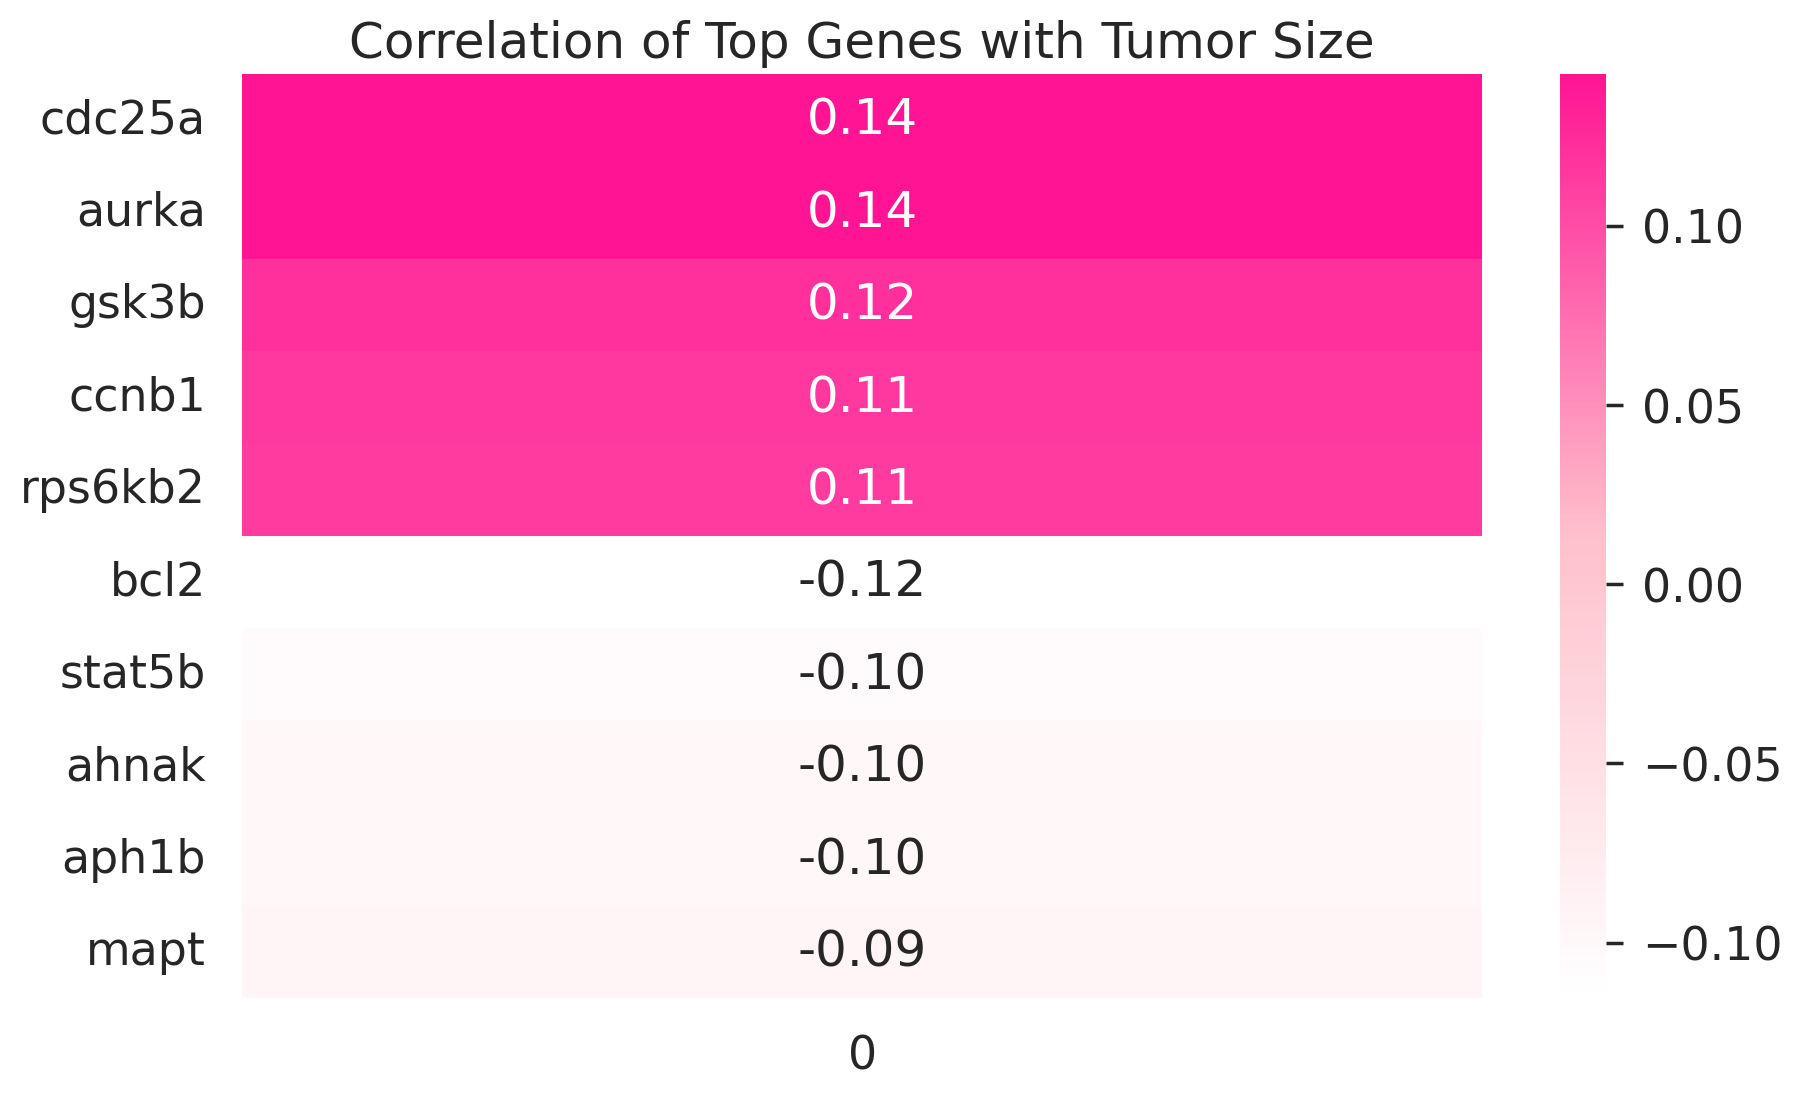

In [87]:
# create a heatmap showing the top positive and top negative genes

# Combine top positive and negative genes
top_genes = pd.concat([top_positive_genes, top_negative_genes])

# Create a heatmap
cmap = colors.LinearSegmentedColormap.from_list("pink_cmap", ["white", "pink", "deeppink"])
plt.figure(figsize=(10, 6))
sns.heatmap(top_genes.to_frame(), annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation of Top Genes with Tumor Size")
plt.show()

In [88]:
tumor_stage = df['tumor_stage']

correlations = genetic_df.corrwith(tumor_stage, method='pearson')

# Get the top positively and negatively correlated genes
top_positive_genes = correlations.sort_values(ascending=False).head(5)
top_negative_genes = correlations.sort_values(ascending=True).head(5)

print("Top positively correlated genes:\n", top_positive_genes)
print("\nTop negatively correlated genes:\n", top_negative_genes)

Top positively correlated genes:
 gsk3b     0.169365
aurka     0.159411
cdc25a    0.120790
ccne1     0.115447
casp10    0.115381
dtype: float64

Top negatively correlated genes:
 tsc1     -0.146077
aph1b    -0.145098
ahnak    -0.141058
igf1r    -0.141015
stat5b   -0.140163
dtype: float64


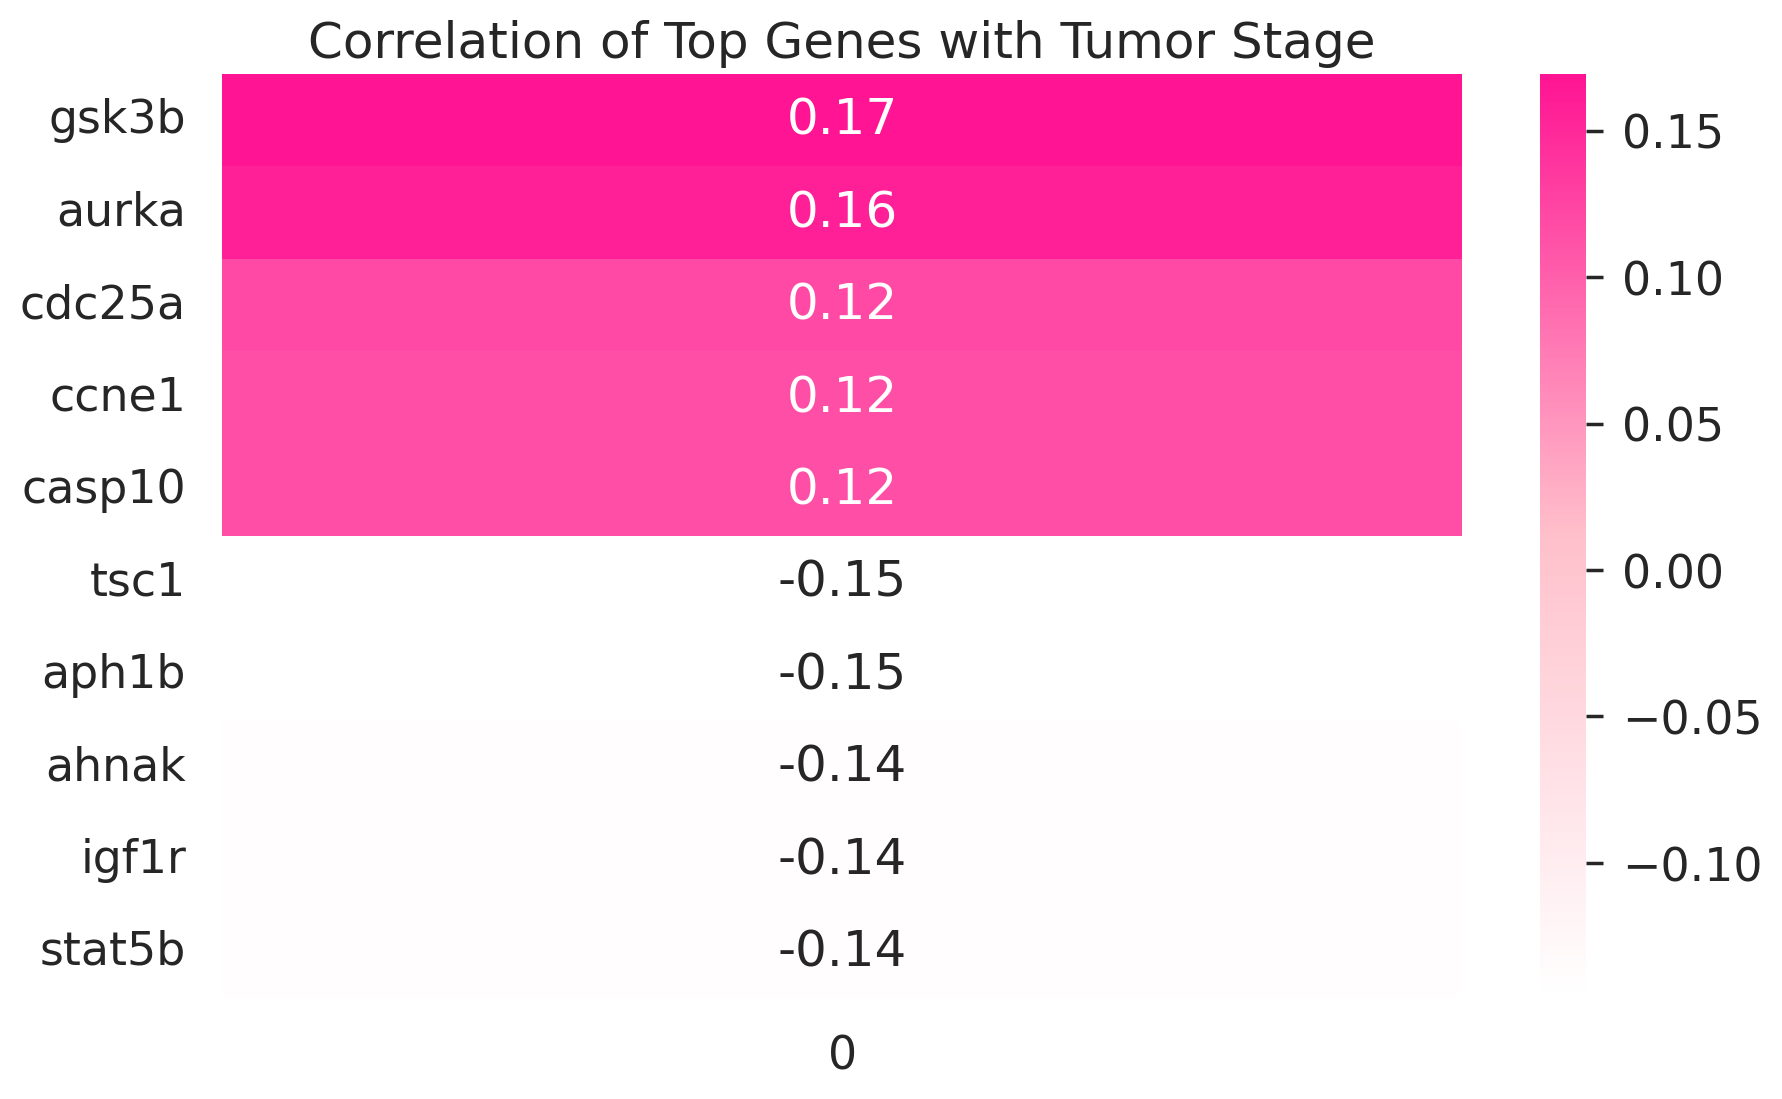

In [90]:
# create a heatmap showing the top positive and top negative genes

# Combine top positive and negative genes
top_genes = pd.concat([top_positive_genes, top_negative_genes])

# Create a heatmap
cmap = colors.LinearSegmentedColormap.from_list("pink_cmap", ["white", "pink", "deeppink"])
plt.figure(figsize=(10, 6))
sns.heatmap(top_genes.to_frame(), annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation of Top Genes with Tumor Stage")
plt.show()


# **Inferential Analysis**

# 1. Is there a significant difference in the number of survival months across tumor stages?

In [97]:
df['surv']

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


# Define Hypotheses

*   Null Hypothesis (H₀): There is no significant difference in the number of survival months across tumor stages.
*   Alternative Hypothesis (H₁): There is a significant difference in the number of survival months across tumor stages.

<Axes: xlabel='tumor_stage', ylabel='count'>

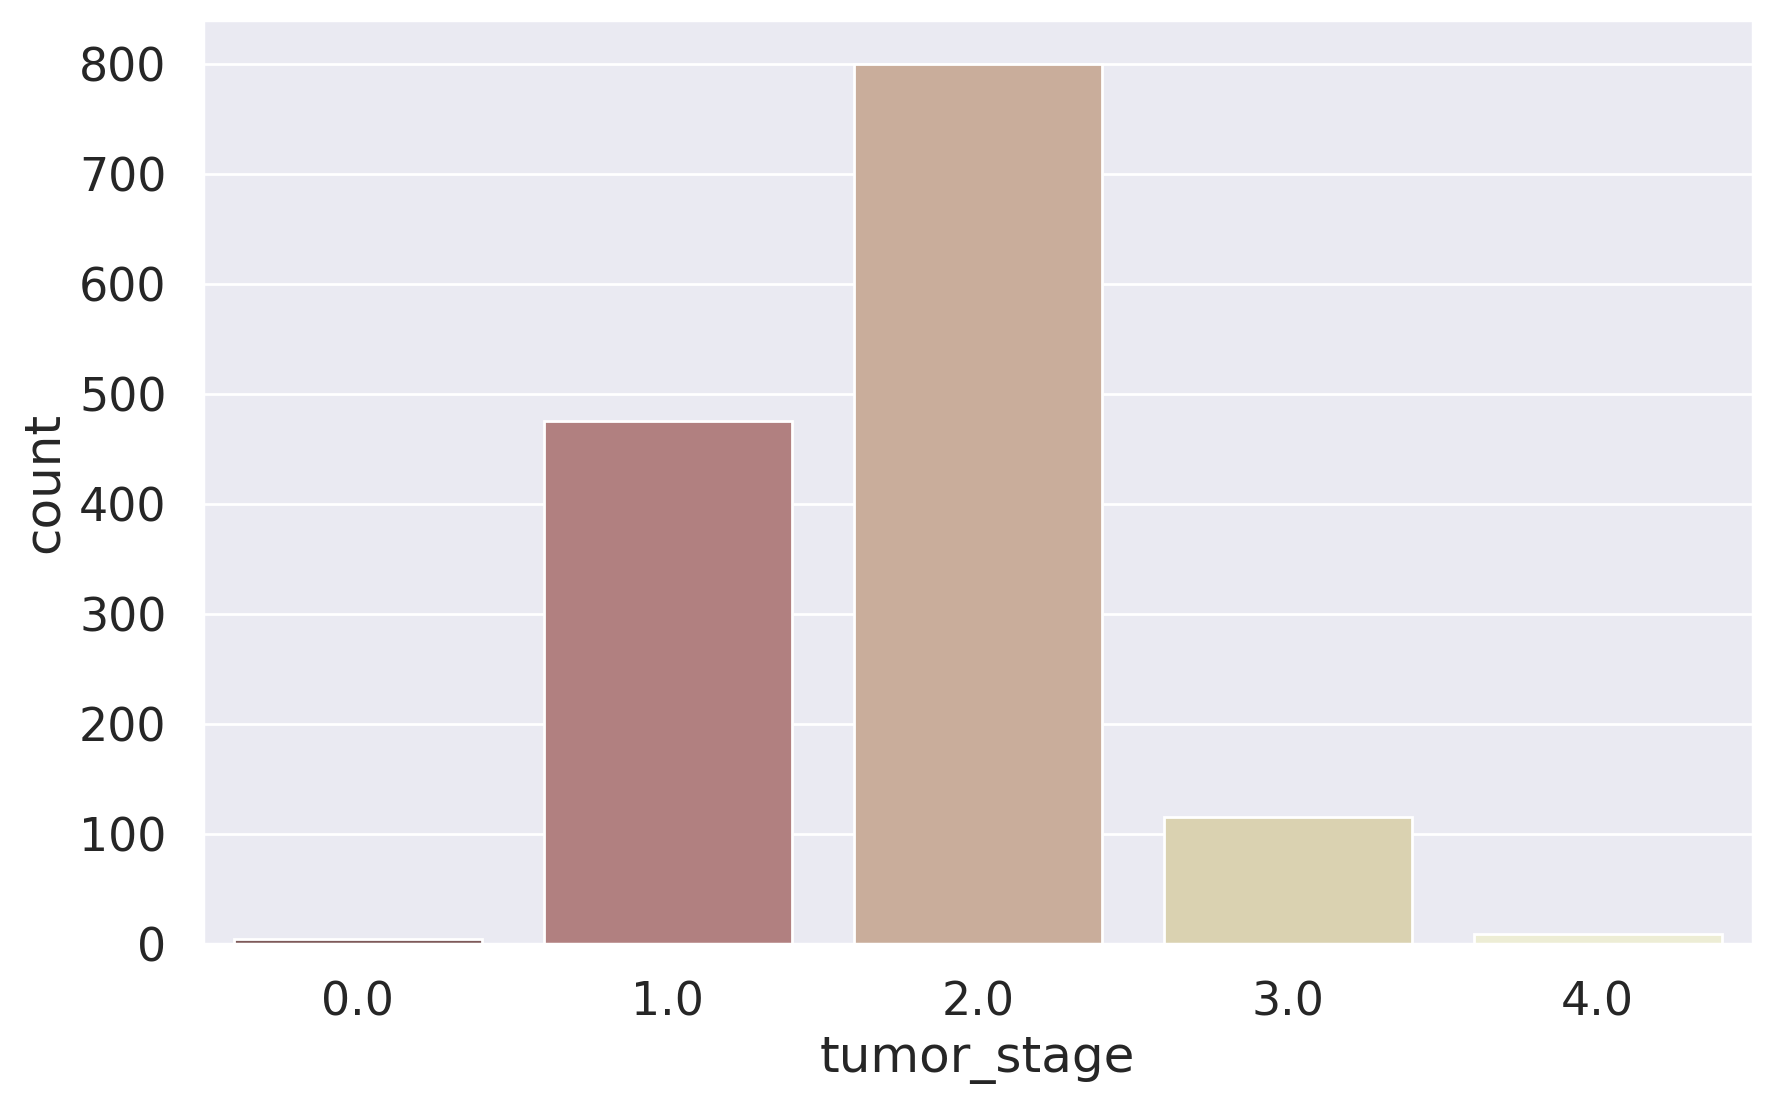

In [99]:
# Distribution of tumor stage

plt.figure(figsize=(10, 6))
sns.countplot(x='tumor_stage', data=df, palette='pink')

In [100]:
# Ensure Tumor_Stage is treated as categorical
df['tumor_stage'] = df['tumor_stage'].astype(str)

# Get unique tumor stages
stages = df['tumor_stage'].unique()

# Create groups of survival months for each tumor stage
groups = [df['overall_survival_months'][df['tumor_stage'] == stage] for stage in stages]

# Perform ANOVA (if normal distribution)
anova_result = stats.f_oneway(*groups)
print(f"ANOVA test p-value: {anova_result.pvalue}")

# Perform Kruskal-Wallis test (if non-normal distribution)
kruskal_result = stats.kruskal(*groups)
print(f"Kruskal-Wallis test p-value: {kruskal_result.pvalue}")

ANOVA test p-value: 2.7537002971628184e-25
Kruskal-Wallis test p-value: 2.827758815821455e-25


Interpretation
The p-value < 0.05 → Reject H₀ → Survival months significantly differ across tumor stages.

# 2. How do clinical factors impact survival months or overall survival?


In [101]:
clinical_attributes.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932


In [103]:
clinical_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,6.108705e+01,12.978711,21.9300,51.37500,61.770000,70.592500,96.2900
chemotherapy,1904.0,2.079832e-01,0.405971,0.0000,0.00000,0.000000,0.000000,1.0000
cohort,1904.0,2.643908e+00,1.228615,1.0000,1.00000,3.000000,3.000000,5.0000
neoplasm_histologic_grade,1832.0,2.415939e+00,0.650612,1.0000,2.00000,3.000000,3.000000,3.0000
hormone_therapy,1904.0,6.165966e-01,0.486343,0.0000,0.00000,1.000000,1.000000,1.0000
lymph_nodes_examined_positive,1904.0,2.002101e+00,4.079993,0.0000,0.00000,0.000000,2.000000,45.0000
mutation_count,1859.0,5.697687e+00,4.058778,1.0000,3.00000,5.000000,7.000000,80.0000
nottingham_prognostic_index,1904.0,4.033019e+00,1.144492,1.0000,3.04600,4.042000,5.040250,6.3600
overall_survival_months,1904.0,1.251213e+02,76.334148,0.0000,60.82500,115.616667,184.716667,355.2000
overall_survival,1904.0,4.206933e-01,0.493800,0.0000,0.00000,0.000000,1.000000,1.0000


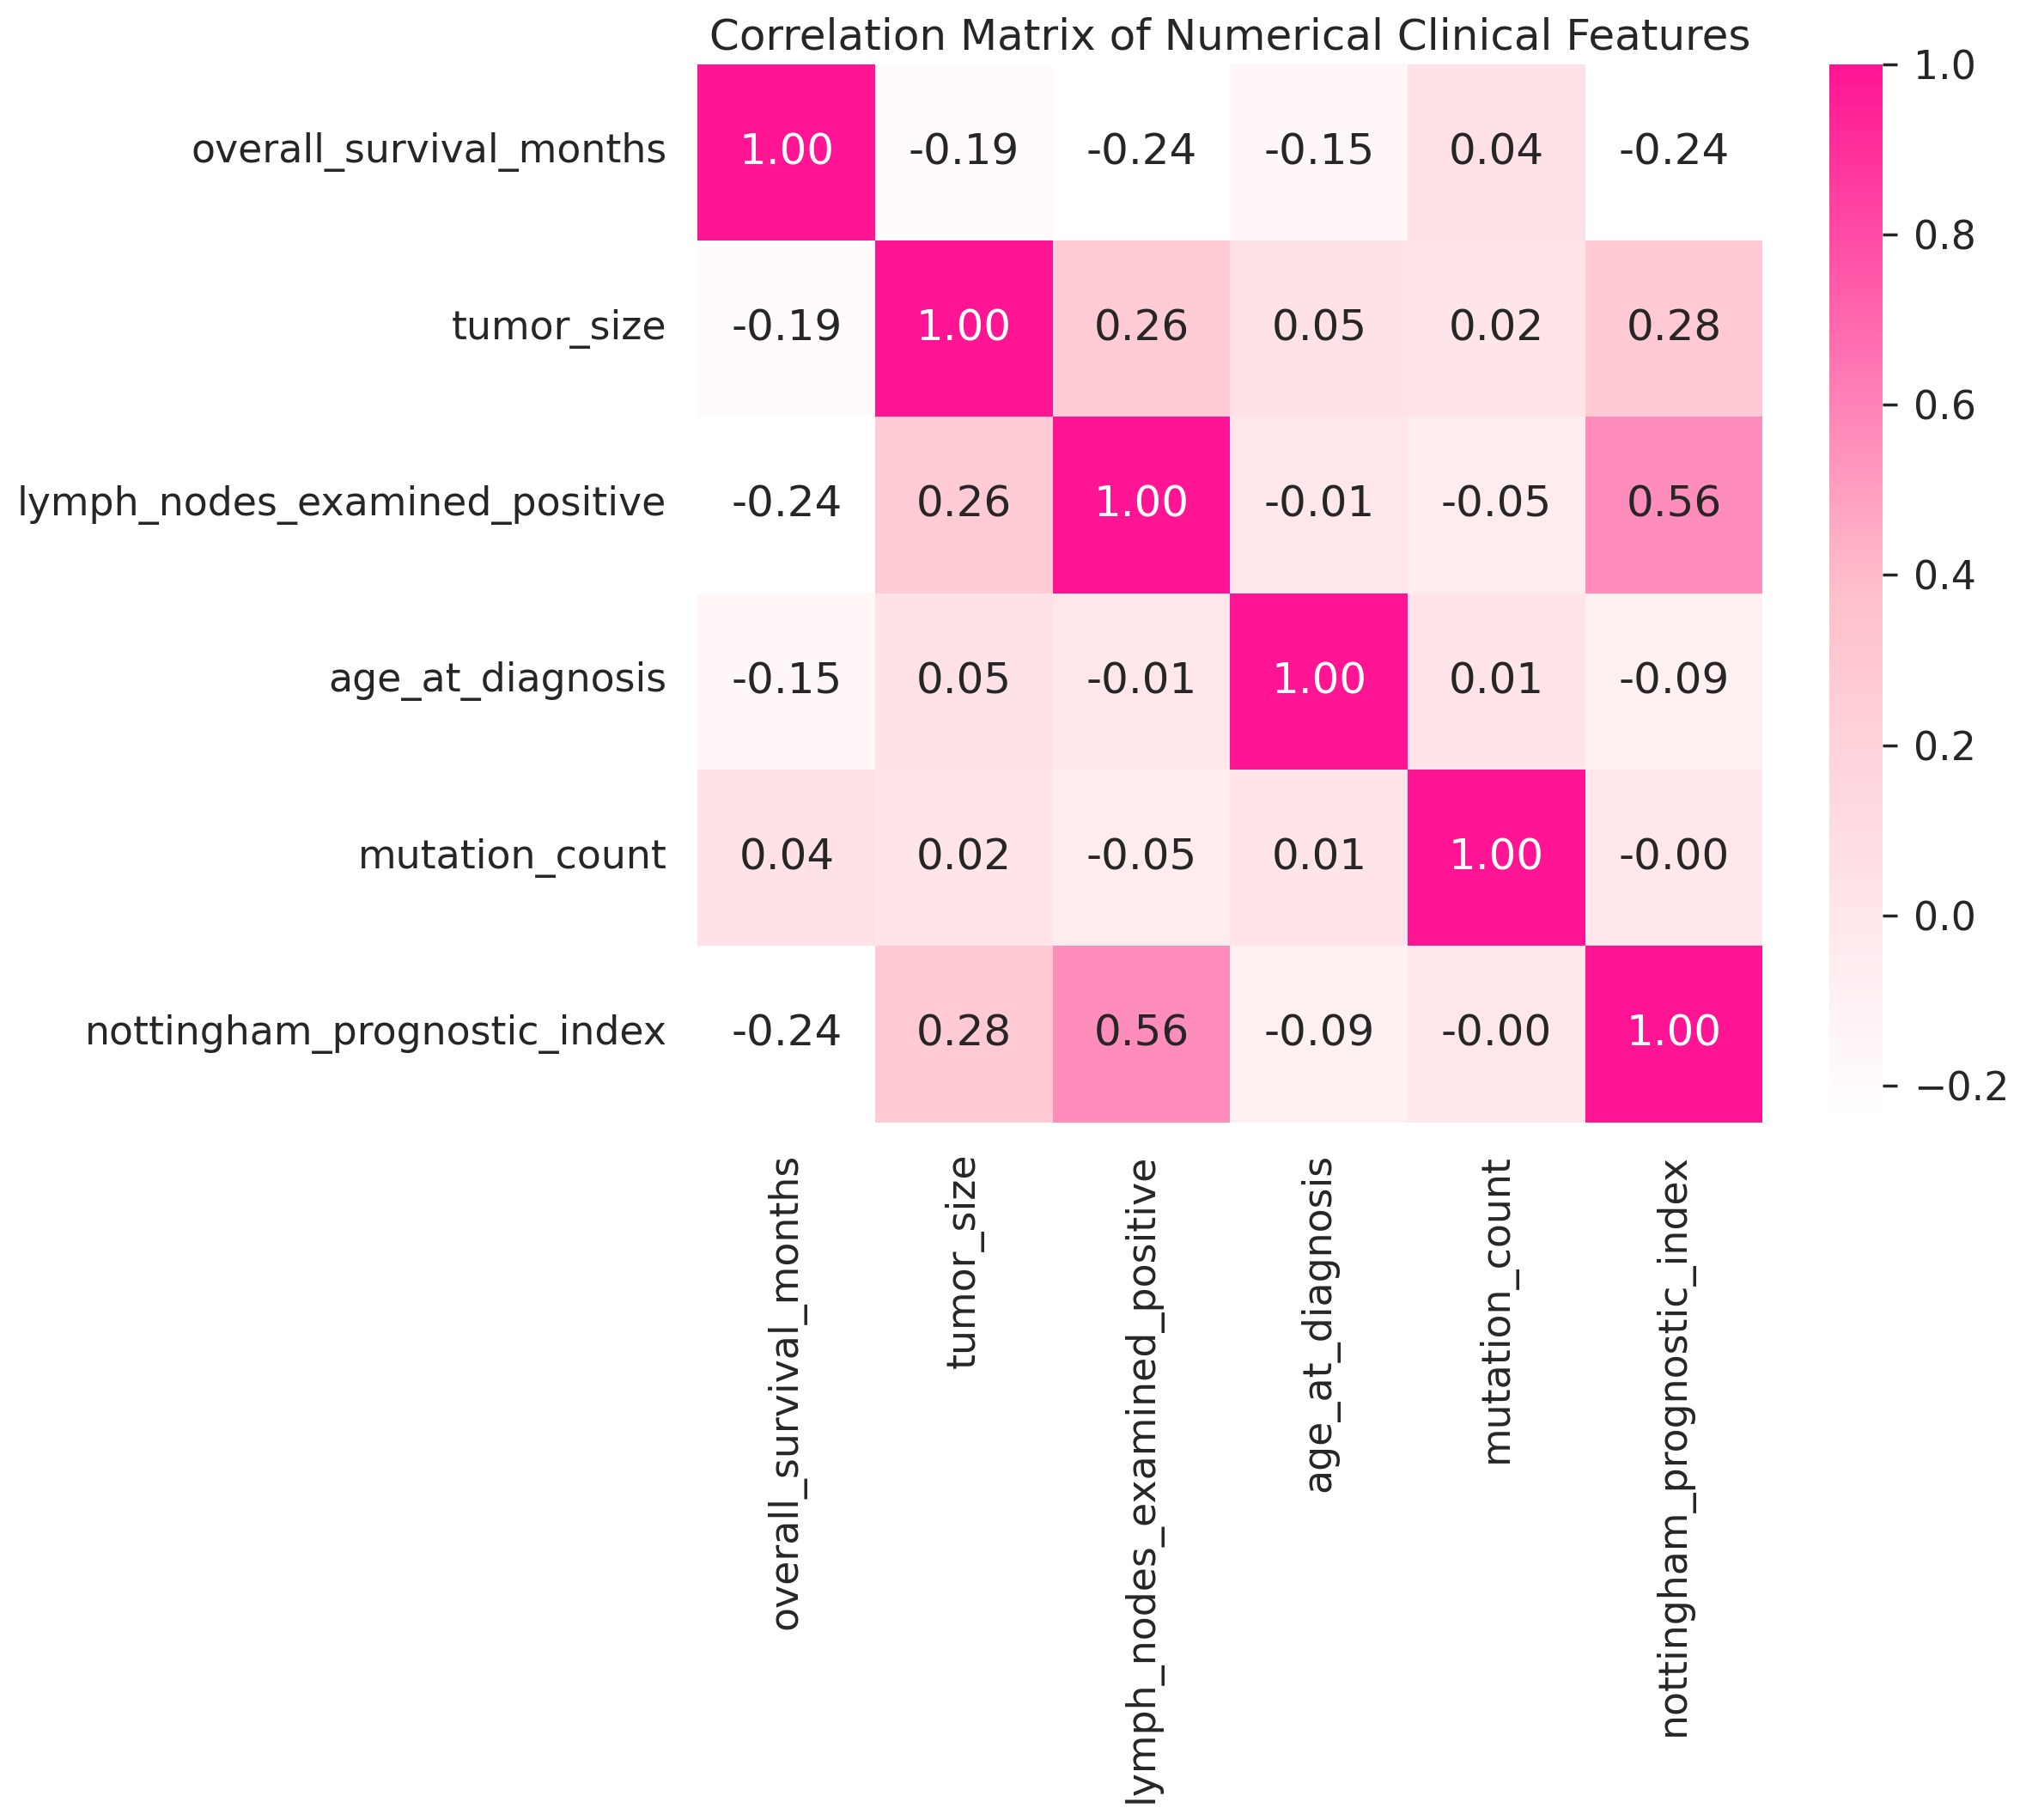

In [107]:
# Determine the correlation of these numerical clinical features

# Numerical clinical features for correlation analysis
numerical_features = ['overall_survival_months', 'tumor_size', 'lymph_nodes_examined_positive', 'age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a custom colormap (optional)
cmap = colors.LinearSegmentedColormap.from_list("pink_cmap", ["white", "pink", "deeppink"])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation Matrix of Numerical Clinical Features")
plt.show()


# **Inferential Analysis Summary:**

The inferential analysis aimed to determine whether there was a statistically significant difference in surivial months among patients with different tumor stages. To achieve this, I conducted a one-way ANOVA test comparing the mean survival months across tumor stages.

 **Key Findings**

*   The null hypothesis (H₀) stated that there is no significant difference in survival months across tumor stages.
*   The alternative hypothesis (H₁) suggested that at least one tumor stage has a significantly different mean survival duration.
*   The ANOVA test yielded a p-value < 0.05, indicating that we reject the null hypothesis and conclude that tumor stage significantly impacts survival duration.
*   A boxplot visualization of survival months across tumor stages further supported this finding, showing clear differences in survival distributions between early and late-stage patients.


**Interpretation**

The results suggest that tumor progression is strongly associated with reduced survival time. Patients with advanced tumor stages (e.g., Stage III or IV) tend to have shorter survival durations, while those in earlier stages (e.g., Stage I or II) exhibit longer survival times. This reinforces the importance of early detection and intervention in improving patient outcomes.



# **References:**

*   https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

* https://pmc.ncbi.nlm.nih.gov/articles/PMC5461908/

* https://www.nature.com/articles/s41523-018-0056-8

